# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2.What data is available?

In [2]:
import os
import pandas as pd
import numpy as np
import re

In [3]:
PUIdata = os.getenv('PUIDATA')

In [4]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Think about possible measurement errors

In [49]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

#### How many unique values do we have? 

In [6]:
data_drop=data.drop_duplicates(subset=['Unique Key'])

In [7]:
print 'original data has', len(data) , 'complaints'
print 'unique values are', len(data_drop)

original data has 10187766 complaints
unique values are 10187744


#### Check for duplicates? Are these plausible?

In [100]:
print 'duplicates number:',  len(data)-len(data_drop)

duplicates number: 22


In [101]:
print '22 duplicates in 10187766 complaints seems to be incredible!'

22 duplicates in 10187766 complaints seems to be incredible!


#### Check if all Boroughs and Community Districts are represented in the Data 

In [47]:
data.Borough.value_counts()

BROOKLYN         2831932
QUEENS           2189760
MANHATTAN        1900005
BRONX            1665625
Unspecified      1109446
STATEN ISLAND     490998
Name: Borough, dtype: int64

In [8]:
cb=data['Community Board'].value_counts()
print cb
len(cb)

0 Unspecified                1109446
12 MANHATTAN                  268053
Unspecified BROOKLYN          257844
12 QUEENS                     229383
Unspecified MANHATTAN         229164
Unspecified QUEENS            218268
Unspecified BRONX             199775
03 BROOKLYN                   197306
07 QUEENS                     195961
17 BROOKLYN                   191720
05 BROOKLYN                   189765
14 BROOKLYN                   187794
07 BRONX                      185729
01 BROOKLYN                   185057
01 STATEN ISLAND              182713
04 BRONX                      181953
01 QUEENS                     171484
05 QUEENS                     168570
12 BRONX                      168455
13 QUEENS                     163851
05 BRONX                      161078
18 BROOKLYN                   156100
07 MANHATTAN                  151419
09 QUEENS                     151242
12 BROOKLYN                   150320
03 MANHATTAN                  150296
08 MANHATTAN                  149076
0

77

#### Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
#### We should have 59 Community Districts.

In [9]:
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [10]:
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [40]:
df_pop.cd_id   # this has right number of community district: 59

0        BX08
1        BX12
2        BX10
3        BX11
4        BX03
5        BX06
6        BX07
7        BX05
8        BX04
9        BX09
10       BX01
11       BX02
12       MN12
13       MN09
14       MN10
15    MN11111
16       MN08
17       MN07
18       MN05
19       MN04
20       MN06
21       MN03
22       MN01
23       MN02
24       SI03
25       SI02
26       SI01
27       BK01
28       BK04
29       BK03
30       BK02
31       BK06
32       BK08
33       BK16
34       BK05
35       BK18
36       BK17
37       BK09
38       BK07
39       BK10
40       BK12
41       BK14
42       BK15
43       BK11
44       BK13
45       QN01
46       QN03
47       QN07
48       QN11
49       QN13
50       QN08
51       QN04
52       QN06
53       QN02
54       QN05
55       QN09
56       QN12
57       QN10
58       QN14
Name: cd_id, dtype: object

In [11]:
print 'invalid community district as below:'
invalid_cd=[]
j = 0
for i in cb.keys():
    if i[3] == 'Q':
        if i[0:2] > '14':
            invalid_cd.append(i)
            j += 1
    elif i[3] == 'M':
        if i[0:2] > '12':
            invalid_cd.append(i)
            j += 1
    elif i[3:8] == 'BROOK':   #BROOKLYN AND BRONX DIFFERENCE 
        if i[0:2] > '18':
            invalid_cd.append(i)
            j += 1
    elif i[3] == 'S':
        if i[0:2] > '03':
            invalid_cd.append(i)
            j += 1
    elif i[3:8] == 'BRONX':
        if i[0:2] > '12':
            invalid_cd.append(i)
            j += 1
    else:
        invalid_cd.append(i)
        j += 1
print 'number of invalid community districts:',j
invalid_cd

invalid community district as below:
number of invalid community districts: 18


['0 Unspecified',
 'Unspecified BROOKLYN',
 'Unspecified MANHATTAN',
 'Unspecified QUEENS',
 'Unspecified BRONX',
 'Unspecified STATEN ISLAND',
 '83 QUEENS',
 '80 QUEENS',
 '81 QUEENS',
 '64 MANHATTAN',
 '56 BROOKLYN',
 '55 BROOKLYN',
 '82 QUEENS',
 '95 STATEN ISLAND',
 '27 BRONX',
 '28 BRONX',
 '26 BRONX',
 '84 QUEENS']

#### Generate marker for unplausible Community Districts
#### How do these districts look like? 
#### Drop the marked districts

In [12]:
for i in invalid_cd:
    data=data[data['Community Board'] != i]

In [13]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Department of Transportation,Highway Condition,Pothole - Highway,Highway,10304,NaN,...,Staten Island Expwy,East/Brooklyn Bound,Roadway,Clove Rd/Richmond Rd (Exit 13) - Lily Pond Ave...,NaN,NaN,NaN,40.606875,-74.085408,"(40.60687536641399, -74.0854077221027)"
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10021,1402 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769379,-73.957930,"(40.769378795761845, -73.95793023233308)"


#### What about missing values? Can you detect any patterns? 

In [14]:
nan_value={}
for i in data.columns:
    nan_value[i]=data[i].isnull().sum()
nan_value

{'Address Type': 89250,
 'Agency': 0,
 'Agency Name': 0,
 'Borough': 0,
 'Bridge Highway Direction': 8087126,
 'Bridge Highway Name': 8087126,
 'Bridge Highway Segment': 8087344,
 'City': 20217,
 'Closed Date': 364858,
 'Community Board': 0,
 'Complaint Type': 0,
 'Created Date': 0,
 'Cross Street 1': 1786898,
 'Cross Street 2': 1791830,
 'Descriptor': 30545,
 'Due Date': 5331860,
 'Facility Type': 6505568,
 'Ferry Direction': 8110945,
 'Ferry Terminal Name': 8109048,
 'Garage Lot Name': 8106612,
 'Incident Address': 1474298,
 'Incident Zip': 20407,
 'Intersection Street 1': 6701630,
 'Intersection Street 2': 6701540,
 'Landmark': 8108303,
 'Latitude': 85468,
 'Location': 85468,
 'Location Type': 2110441,
 'Longitude': 85468,
 'Park Borough': 0,
 'Park Facility Name': 0,
 'Resolution Action Updated Date': 157290,
 'Resolution Description': 3021191,
 'Road Ramp': 8087344,
 'School Address': 6,
 'School City': 0,
 'School Code': 43865,
 'School Name': 0,
 'School Not Found': 5395969,
 'S

In [15]:
nan_value = pd.DataFrame(nan_value,index=[0]).T

In [16]:
nan_value.sort(0,ascending = False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
Ferry Direction,8110945
Ferry Terminal Name,8109048
School or Citywide Complaint,8108841
Landmark,8108303
Garage Lot Name,8106612
Vehicle Type,8104207
Taxi Company Borough,8101566
Bridge Highway Segment,8087344
Road Ramp,8087344
Bridge Highway Name,8087126


some missing value is not exact missing , just because some types of complaints don't contain those information. The important missing values are: Location, X Coordinate (State Plane), Longitude, Y Coordinate (State Plane), Latitude. They are missed together.

#### Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
#### to fill missings in Resolution Descriptor?

In [17]:
data['Resolution Description'].fillna(data['Complaint Type'])

0                                            Street Condition
2           The Department of Parks and Recreation usually...
3           Your complaint has been received by the Police...
5           The Department of Transportation requires 10 d...
7           Your complaint has been forwarded to the New Y...
8           The Police Department responded to the complai...
9           The Police Department responded to the complai...
10          Your complaint has been forwarded to the New Y...
11          The Taxi and Limousine Commission will contact...
12          The Police Department issued a summons in resp...
13          The Police Department responded and upon arriv...
14          The Police Department responded to the complai...
15          Your complaint has been forwarded to the New Y...
16          The Police Department responded to the complai...
17          Your complaint has been received by the Police...
18          The Police Department responded to the complai...
19      

#### Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
#### on the Community district level

In [271]:
compl_num=data['Unique Key'].groupby(data['Community Board']).count()

In [272]:
compl_num=pd.DataFrame(compl_num)
compl_num.head()

,Unique Key
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713


In [20]:
compl_num.sort(['Unique Key'],ascending = False,inplace = True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [273]:
compl_num

,Unique Key
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713
02 BRONX,60257
02 BROOKLYN,121022
02 MANHATTAN,133860
02 QUEENS,114333


# 4. How to interpret results?

In [22]:
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [23]:
df_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [24]:
print 'number of Community Board:',len(df_pop.cd_id)

number of Community Board: 59


#### Think about who might be more likely to call 311

In [25]:
#consider top 10% complaining-Community
compl_num.iloc[0:6]

,Unique Key
Community Board,
12 MANHATTAN,268053
12 QUEENS,229383
03 BROOKLYN,197306
07 QUEENS,195961
17 BROOKLYN,191720
05 BROOKLYN,189765


In [26]:
cd=['MN12','QN12','BK03','QN07','BK17','BK05']

In [27]:
data_pop= df_pop[(df_pop.cd_id == cd[0])|(df_pop.cd_id == cd[1])|
                  (df_pop.cd_id == cd[2])|(df_pop.cd_id == cd[3])|
                  (df_pop.cd_id == cd[4])|(df_pop.cd_id == cd[5])]

In [28]:
data_pop.index=cd

In [29]:
data_pop

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
MN12,3603801,MN12,224365,75217.43287,49.80,11.49,19.48,14.51,68.39,18.39,...,3889,6077,32.55,32.34,18.99,0.00,6.70,9.42,3.68,5.74
QN12,3604003,BK03,133235,58004.86816,47.55,12.75,19.43,11.55,77.10,17.30,...,1401,3220,38.00,25.77,23.45,0.34,4.57,7.87,2.39,5.48
BK03,3604008,BK05,155863,26394.76469,45.49,11.18,15.29,12.60,25.03,37.69,...,2532,4407,22.95,31.85,26.95,0.00,6.98,11.27,4.11,7.16
QN07,3604010,BK17,137526,44659.44461,42.60,9.34,14.79,13.25,31.11,10.81,...,500,4202,29.73,32.56,22.41,0.00,7.91,7.39,0.79,6.60
BK17,3604103,QN07,256742,21836.66849,47.61,8.43,14.06,13.96,15.29,48.07,...,4240,6750,31.41,28.34,23.03,0.18,7.83,9.22,3.56,5.66
BK05,3604112,QN12,251002,27089.67720,46.33,10.22,14.74,12.73,NaN,NaN,...,2923,10217,27.46,30.09,24.48,0.00,6.36,11.60,2.58,9.02


In [30]:
data_pop.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,FIPS,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English ""very Well""",...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
count,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,...,6.000000,6.000000,6.0000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.604006e+06,193122.166667,42200.476003,46.563333,10.568333,16.298333,13.100000,43.384000,26.452000,12.234000,...,2580.833333,5812.166667,30.3500,30.158333,23.218333,0.086667,6.725000,9.461667,2.851667,6.610000
std,1.119811e+02,57339.907420,21160.274978,2.427325,1.561146,2.476315,1.052578,27.562937,15.708737,5.737711,...,1435.651130,2515.499268,5.0593,2.681712,2.612986,0.143481,1.222142,1.716268,1.209023,1.345139
min,3.603801e+06,133235.000000,21836.668490,42.600000,8.430000,14.060000,11.550000,15.290000,10.810000,3.930000,...,500.000000,3220.000000,22.9500,25.770000,18.990000,0.000000,4.570000,7.390000,0.790000,5.480000
25%,3.604004e+06,142110.250000,26568.492818,45.700000,9.560000,14.752500,12.632500,NaN,NaN,NaN,...,1683.750000,4253.250000,28.0275,28.777500,22.565000,0.000000,6.445000,8.207500,2.437500,5.680000
50%,3.604009e+06,190114.000000,35874.560905,46.940000,10.700000,15.040000,12.990000,NaN,NaN,NaN,...,2727.500000,5242.000000,30.5700,30.970000,23.240000,0.000000,6.840000,9.320000,3.070000,6.170000
75%,3.604080e+06,244342.750000,54668.512273,47.595000,11.412500,18.395000,13.782500,NaN,NaN,NaN,...,3647.500000,6581.750000,32.2650,32.217500,24.222500,0.135000,7.617500,10.807500,3.650000,7.020000
max,3.604112e+06,256742.000000,75217.432870,49.800000,12.750000,19.480000,14.510000,77.100000,48.070000,18.680000,...,4240.000000,10217.000000,38.0000,32.560000,26.950000,0.340000,7.910000,11.600000,4.110000,9.020000


In [31]:
df_pop.describe()

,FIPS,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English ""very Well""",...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
count,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,55.000000,55.000000,55.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,3.603924e+06,154912.254237,43473.392494,47.680339,9.789153,18.024746,13.945932,51.229455,24.718182,13.373818,...,1870.559322,4290.847458,38.618136,24.051186,22.319661,0.063898,6.124407,8.822881,2.650508,6.171356
std,1.522030e+02,33363.711445,23772.533649,2.290277,2.568976,5.064325,2.161282,18.751635,18.511786,8.887922,...,1081.874320,2409.636014,16.430866,9.891363,2.793881,0.135901,2.943585,4.124943,1.311567,3.113419
min,3.603701e+06,106737.000000,6371.997113,42.110000,4.030000,10.340000,10.320000,15.290000,4.530000,3.010000,...,169.000000,667.000000,16.100000,4.220000,14.910000,0.000000,0.750000,0.710000,0.130000,0.580000
25%,3.603804e+06,132438.500000,26742.220945,46.100000,8.470000,14.765000,12.485000,NaN,NaN,NaN,...,993.000000,2460.000000,27.965000,19.675000,20.440000,0.000000,3.610000,6.175000,1.705000,4.190000
50%,3.604003e+06,150100.000000,39405.792220,47.840000,9.450000,16.340000,13.470000,NaN,NaN,NaN,...,1749.000000,4174.000000,35.730000,24.700000,22.290000,0.000000,6.480000,8.960000,2.420000,6.090000
75%,3.604018e+06,171494.000000,55173.012980,49.350000,11.040000,20.010000,15.000000,NaN,NaN,NaN,...,2349.000000,5852.500000,45.080000,30.960000,23.810000,0.070000,7.870000,11.630000,3.525000,8.635000
max,3.604114e+06,256742.000000,109960.139600,52.210000,19.140000,29.880000,21.130000,80.230000,66.530000,31.860000,...,4712.000000,10217.000000,73.330000,41.000000,28.960000,0.780000,11.750000,17.740000,5.770000,12.170000


In [32]:
total_mean = pd.DataFrame(df_pop.describe().iloc[1]).T
total_mean

,FIPS,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English ""very Well""",...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
mean,3.603924e+06,154912.254237,43473.392494,47.680339,9.789153,18.024746,13.945932,51.229455,24.718182,13.373818,...,1870.559322,4290.847458,38.618136,24.051186,22.319661,0.063898,6.124407,8.822881,2.650508,6.171356


In [33]:
top6_mean = pd.DataFrame(data_pop.describe().iloc[1]).T
top6_mean

,FIPS,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English ""very Well""",...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
mean,3.604006e+06,193122.166667,42200.476003,46.563333,10.568333,16.298333,13.1,43.384,26.452,12.234,...,2580.833333,5812.166667,30.35,30.158333,23.218333,0.086667,6.725,9.461667,2.851667,6.61


In [34]:
for i in top6_mean.columns:
    if top6_mean.loc['mean',i] > total_mean.loc['mean',i]:
        print i

FIPS
Total Population
% Total Population: 18 to 24 Years
% Population 5 Years And Over: Spanish or Spanish Creole
% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"
Population 25 Years and over:
Population 25 Years and over: Less Than High School
Population 25 Years and over: High School Graduate (includes equivalency)
Population 25 Years and over: Some college
% Population 25 Years and over: Less Than High School
% Population 25 Years and over: High School Graduate (includes equivalency)
% Population 25 Years and over: Some college
Population 25 Years and over:.1
Population 25 Years and over: Less Than High School.1
Population 25 Years and over: High School Graduate or more (includes equivalency)
Population 25 Years and over: Some college or more
% Population 25 Years and over: Less Than High School.1
Population 3 Years and over:
Population 3 Years and over: Enrolled in School
Population 3 Years and over: Not Enrolled in School
% Population 3

In [38]:
print 'people between 18-24,speaking Spanish or Spanish C ,female are more likely to complain'

people between 18-24,speaking Spanish or Spanish C ,female are more likely to complain


In [39]:
# Infrastructure by Community District

In [40]:
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [44]:
df_infr

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980
5,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980
6,3603706,79500US3603706,"NYC-Bronx Community District 7--Bedford Park, ...",47252,31468,0,1598,502,1096,18280,...,1624,4655,11129,66.60,47252,38899,0,31021,7878,8353
7,3603707,79500US3603707,NYC-Bronx Community District 5--Morris Heights...,44699,26332,54,956,352,604,11333,...,1062,2980,15387,58.91,44699,34397,54,25772,8571,10302
8,3603708,79500US3603708,"NYC-Bronx Community District 4--Concourse, New...",47935,29376,316,301,73,228,14610,...,2374,3701,14858,61.28,47935,34692,316,27971,6405,13243
9,3603709,79500US3603709,"NYC-Bronx Community District 9--Castle Hill, N...",64011,45976,180,1536,296,1240,23999,...,1663,1871,16164,71.83,64011,53072,180,45261,7631,10939


In [42]:
# Check variables in file

In [43]:
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [47]:
print 'infrastructure data contains' , len(df_infr) , 'community board'

infrastructure data contains 59 community board


In [55]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

### sort in percentage of internet subscription households
df_infr.sort('% Households: With An Internet Subscription' , ascending = False )

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
31,3604005,79500US3604005,"NYC-Brooklyn Community District 6--Park Slope,...",49709,44770,57,4567,2630,1937,31445,...,1592,714,4225,90.06,49709,45850,57,44121,1672,3859
16,3603805,79500US3603805,NYC-Manhattan Community District 8--Upper East...,114838,103065,121,8845,4497,4348,68219,...,3952,3000,8773,89.75,114838,108746,121,102849,5776,6092
23,3603810,79500US3603810,NYC-Manhattan Community District 1 & 2--Batter...,83976,74694,132,4862,2565,2297,47820,...,1795,3089,6193,88.95,83976,79890,132,74339,5419,4086
22,3603810,79500US3603810,NYC-Manhattan Community District 1 & 2--Batter...,83976,74694,132,4862,2565,2297,47820,...,1795,3089,6193,88.95,83976,79890,132,74339,5419,4086
17,3603806,79500US3603806,NYC-Manhattan Community District 7--Upper West...,97229,85575,107,7758,3606,4152,53973,...,4451,3020,8634,88.01,97229,90861,107,85468,5286,6368
20,3603808,79500US3603808,NYC-Manhattan Community District 6--Murray Hil...,80268,70507,542,3413,1576,1837,45618,...,1334,1925,7836,87.84,80268,75563,471,69676,5416,4705
48,3604104,79500US3604104,"NYC-Queens Community District 11--Bayside, New...",43279,37361,79,2213,660,1553,15502,...,639,621,5297,86.33,43279,38880,79,37199,1602,4399
24,3603901,79500US3603901,NYC-Staten Island Community District 3--Totten...,57658,49218,0,1885,715,1170,14088,...,718,1821,6619,85.36,57658,52592,0,48956,3636,5066
18,3603807,79500US3603807,NYC-Manhattan Community District 4 & 5--Chelse...,82762,70067,53,5890,2289,3601,42358,...,2578,3330,9365,84.66,82762,75759,53,69776,5930,7003
19,3603807,79500US3603807,NYC-Manhattan Community District 4 & 5--Chelse...,82762,70067,53,5890,2289,3601,42358,...,2578,3330,9365,84.66,82762,75759,53,69776,5930,7003


In [92]:
# Aggregate the mobile subscription data
mobile_sub=df_infr[['Qualifying Name','Households: With Mobile Broadband','Households: With Mobile Broadband.1','Households: With Mobile Broadband.2',
        'Households: With Mobile Broadband.3','Households: With Mobile Broadband.4','Households: Dial-Up Alone',
         'Households: Dsl','Households: Cable Modem', 'Households: Fiber-Optic','Households: Satellite Internet Service',
         'Households: Mobile Broadband Alone or With Dialup','Households: With Dial-Up Internet Subscription Alone'
        ]]

In [93]:
mobile_sum = mobile_sub.sum()
mobile_sub_sum = mobile_sub.append(mobile_sum,ignore_index=True)

In [94]:
mobile_sub_sum

,Qualifying Name,Households: With Mobile Broadband,Households: With Mobile Broadband.1,Households: With Mobile Broadband.2,Households: With Mobile Broadband.3,Households: With Mobile Broadband.4,Households: Dial-Up Alone,Households: Dsl,Households: Cable Modem,Households: Fiber-Optic,Households: Satellite Internet Service,Households: Mobile Broadband Alone or With Dialup,Households: With Dial-Up Internet Subscription Alone
0,"NYC-Bronx Community District 8--Riverdale, New...",946,10433,433,37,3510,444,2813,19178,939,75,2168,404
1,"NYC-Bronx Community District 12--Wakefield, Ne...",405,5577,2358,0,2146,178,849,18653,6216,131,928,178
2,"NYC-Bronx Community District 10--Co-op City, N...",398,6377,1200,0,3450,158,1863,20044,3490,0,639,158
3,NYC-Bronx Community District 11--Pelham Parkwa...,474,5624,2272,241,2137,141,1478,17917,5435,308,1001,122
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",651,6690,695,111,6760,88,1297,15847,1510,194,1385,88
5,"NYC-Bronx Community District 3 & 6--Belmont, N...",651,6690,695,111,6760,88,1297,15847,1510,194,1385,88
6,"NYC-Bronx Community District 7--Bedford Park, ...",502,9180,1243,0,4160,0,1598,18280,2748,0,1624,0
7,NYC-Bronx Community District 5--Morris Heights...,352,5910,116,107,8310,54,956,11333,142,361,1062,54
8,"NYC-Bronx Community District 4--Concourse, New...",73,7931,877,231,6856,316,301,14610,1142,416,2374,316
9,"NYC-Bronx Community District 9--Castle Hill, N...",296,4550,1877,117,4389,180,1536,23999,6507,489,1663,180


In [291]:
internet_type = mobile_sub_sum.T.sort(59,ascending = False)
internet_type = internet_type.T

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [292]:
internet_type

,Qualifying Name,Households: Cable Modem,Households: With Mobile Broadband.1,Households: Fiber-Optic,Households: With Mobile Broadband.4,Households: Dsl,Households: With Mobile Broadband.2,Households: Mobile Broadband Alone or With Dialup,Households: With Mobile Broadband,Households: Satellite Internet Service,Households: Dial-Up Alone,Households: With Dial-Up Internet Subscription Alone,Households: With Mobile Broadband.3
0,"NYC-Bronx Community District 8--Riverdale, New...",19178,10433,939,3510,2813,433,2168,946,75,444,404,37
1,"NYC-Bronx Community District 12--Wakefield, Ne...",18653,5577,6216,2146,849,2358,928,405,131,178,178,0
2,"NYC-Bronx Community District 10--Co-op City, N...",20044,6377,3490,3450,1863,1200,639,398,0,158,158,0
3,NYC-Bronx Community District 11--Pelham Parkwa...,17917,5624,5435,2137,1478,2272,1001,474,308,141,122,241
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",15847,6690,1510,6760,1297,695,1385,651,194,88,88,111
5,"NYC-Bronx Community District 3 & 6--Belmont, N...",15847,6690,1510,6760,1297,695,1385,651,194,88,88,111
6,"NYC-Bronx Community District 7--Bedford Park, ...",18280,9180,2748,4160,1598,1243,1624,502,0,0,0,0
7,NYC-Bronx Community District 5--Morris Heights...,11333,5910,142,8310,956,116,1062,352,361,54,54,107
8,"NYC-Bronx Community District 4--Concourse, New...",14610,7931,1142,6856,301,877,2374,73,416,316,316,231
9,"NYC-Bronx Community District 9--Castle Hill, N...",23999,4550,6507,4389,1536,1877,1663,296,489,180,180,117


# 5. Inform your results by linking datasets

### harmonize dataframe 1

In [282]:
compl_num = compl_num.reset_index()

In [284]:
def convert(community_board):
    l=''
    if community_board[3]== 'M':
        l='MN'+'%s'%community_board[0:2]
    elif community_board[3]== 'Q':
        l='QN'+'%s'%community_board[0:2]
    elif community_board[3]== 'S':
        l='SI'+'%s'%community_board[0:2]
    elif community_board[3:8]== 'BROOK':
        l='BK'+'%s'%community_board[0:2]
    elif community_board[3:8]== 'BRONX':
        l='BX'+'%s'%community_board[0:2]
    return l

In [283]:
compl_num

,Community Board,Unique Key
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,01 STATEN ISLAND,182713
5,02 BRONX,60257
6,02 BROOKLYN,121022
7,02 MANHATTAN,133860
8,02 QUEENS,114333
9,02 STATEN ISLAND,121132


In [285]:
c_b_convert=[]
for i in range(59):
    c_b_convert.append( convert(compl_num['Community Board'][i]) )
compl_num['Community Board'] = c_b_convert

In [286]:
dataframe1 = compl_num.rename(columns={'Unique Key': ' Complaints'})

In [287]:
dataframe1

,Community Board,Complaints
0,BX01,74631
1,BK01,185057
2,MN01,77974
3,QN01,171484
4,SI01,182713
5,BX02,60257
6,BK02,121022
7,MN02,133860
8,QN02,114333
9,SI02,121132


### harmonize dataframe 2

In [157]:
df_pop.rename(columns={"cd_id":"Community Board"},inplace = True)

In [163]:
dataframe2 = df_pop.drop('FIPS', axis=1)

In [263]:
dataframe2

,Community Board,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English ""very Well""",...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,BX08,106737,31229.950060,46.65,10.73,15.04,11.32,46.80,39.24,24.01,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,BX12,134644,19966.678390,46.35,11.35,14.29,12.57,73.09,18.19,12.12,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,BX10,121209,12913.817030,45.20,8.62,13.74,12.78,61.79,26.43,19.51,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,BX11,135839,35677.954530,50.09,8.10,17.43,14.09,43.22,36.45,22.78,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,BX03,172247,39405.792220,44.72,14.24,14.89,12.38,36.82,54.24,30.09,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04
5,BX06,172247,39405.792220,44.72,14.24,14.89,12.38,28.21,59.53,31.86,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04
6,BX07,135893,86487.077920,48.48,10.58,14.97,15.32,29.10,62.49,30.34,...,2590,4653,21.49,31.83,24.74,0.00,9.34,12.60,4.51,8.09
7,BX05,132850,87974.348600,45.75,13.10,16.34,11.96,29.84,59.43,28.79,...,1927,5345,16.10,39.78,21.56,0.11,8.19,14.26,3.78,10.48
8,BX04,141467,71270.882190,45.64,12.28,12.41,13.10,42.97,47.55,26.89,...,1762,6444,17.47,37.11,23.89,0.00,6.03,15.50,3.33,12.17
9,BX09,190126,42752.506900,47.59,11.15,15.22,12.54,33.62,61.02,29.07,...,3061,7466,22.34,29.50,24.34,0.00,10.17,13.65,3.97,9.68


### harmonize dataframe3

In [288]:
convert2('NYC-Bronx Community District 8--Riverdale, New...')

'BX08'

In [261]:
def convert2(community_board):
    l = ''
    d = re.findall(r'\d+',community_board)[0]
    if len(d)== 1:
        d = '0'+d
    if community_board[4]== 'M':
        l='MN'+'%s'%d
    elif community_board[4]== 'Q':
        l='QN'+'%s'%d
    elif community_board[4]== 'S':
        l='SI'+'%s'%d
    elif community_board[4:9]== 'Brook':
        l='BK'+'%s'%d
    elif community_board[4:9]== 'Bronx':
        l='BX'+'%s'%d
    return l

In [290]:
internet_type['Qualifying Name']

0     BN08
1     BN12
2     BN10
3     BN11
4     BN03
5     BN03
6     BN07
7     BN05
8     BN04
9     BN09
10    BN01
11    BN01
12    MN12
13    MN09
14    MN10
15    MN11
16    MN08
17    MN07
18    MN04
19    MN04
20    MN06
21    MN03
22    MN01
23    MN01
24    SI03
25    SI02
26    SI01
27    BK01
28    BK04
29    BK03
30    BK02
31    BK06
32    BK08
33    BK16
34    BK05
35    BK18
36    BK17
37    BK09
38    BK07
39    BK10
40    BK12
41    BK14
42    BK15
43    BK11
44    BK13
45    QN01
46    QN03
47    QN07
48    QN11
49    QN13
50    QN08
51    QN04
52    QN06
53    QN02
54    QN05
55    QN09
56    QN12
57    QN10
58    QN14
Name: Qualifying Name, dtype: object

In [293]:
internet_type = internet_type.drop(59)

In [294]:
community_board=[]
for i in range(59):
    community_board.append(convert2(internet_type['Qualifying Name'][i]))
community_board

['BX08',
 'BX12',
 'BX10',
 'BX11',
 'BX03',
 'BX03',
 'BX07',
 'BX05',
 'BX04',
 'BX09',
 'BX01',
 'BX01',
 'MN12',
 'MN09',
 'MN10',
 'MN11',
 'MN08',
 'MN07',
 'MN04',
 'MN04',
 'MN06',
 'MN03',
 'MN01',
 'MN01',
 'SI03',
 'SI02',
 'SI01',
 'BK01',
 'BK04',
 'BK03',
 'BK02',
 'BK06',
 'BK08',
 'BK16',
 'BK05',
 'BK18',
 'BK17',
 'BK09',
 'BK07',
 'BK10',
 'BK12',
 'BK14',
 'BK15',
 'BK11',
 'BK13',
 'QN01',
 'QN03',
 'QN07',
 'QN11',
 'QN13',
 'QN08',
 'QN04',
 'QN06',
 'QN02',
 'QN05',
 'QN09',
 'QN12',
 'QN10',
 'QN14']

In [295]:
internet_type['Qualifying Name']=community_board

In [296]:
dataframe3 = internet_type.rename(columns={'Qualifying Name':'Community Board'})

In [297]:
dataframe3

,Community Board,Households: Cable Modem,Households: With Mobile Broadband.1,Households: Fiber-Optic,Households: With Mobile Broadband.4,Households: Dsl,Households: With Mobile Broadband.2,Households: Mobile Broadband Alone or With Dialup,Households: With Mobile Broadband,Households: Satellite Internet Service,Households: Dial-Up Alone,Households: With Dial-Up Internet Subscription Alone,Households: With Mobile Broadband.3
0,BX08,19178,10433,939,3510,2813,433,2168,946,75,444,404,37
1,BX12,18653,5577,6216,2146,849,2358,928,405,131,178,178,0
2,BX10,20044,6377,3490,3450,1863,1200,639,398,0,158,158,0
3,BX11,17917,5624,5435,2137,1478,2272,1001,474,308,141,122,241
4,BX03,15847,6690,1510,6760,1297,695,1385,651,194,88,88,111
5,BX03,15847,6690,1510,6760,1297,695,1385,651,194,88,88,111
6,BX07,18280,9180,2748,4160,1598,1243,1624,502,0,0,0,0
7,BX05,11333,5910,142,8310,956,116,1062,352,361,54,54,107
8,BX04,14610,7931,1142,6856,301,877,2374,73,416,316,316,231
9,BX09,23999,4550,6507,4389,1536,1877,1663,296,489,180,180,117


### merge 3 dataframes!

In [308]:
dataframe2['Community Board'][15]= 'MN11'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [310]:
merged= dataframe1.merge(dataframe2)

In [312]:
merged = merged.merge(dataframe3)

In [313]:
merged

,Community Board,Complaints,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,Households: Fiber-Optic,Households: With Mobile Broadband.4,Households: Dsl,Households: With Mobile Broadband.2,Households: Mobile Broadband Alone or With Dialup,Households: With Mobile Broadband,Households: Satellite Internet Service,Households: Dial-Up Alone,Households: With Dial-Up Internet Subscription Alone,Households: With Mobile Broadband.3
0,BX01,74631,167147,34412.075240,49.63,12.76,18.26,12.04,27.49,66.53,...,2094,7233,982,744,1002,360,1145,0,0,157
1,BX01,74631,167147,34412.075240,49.63,12.76,18.26,12.04,27.49,66.53,...,2094,7233,982,744,1002,360,1145,0,0,157
2,BK01,185057,154713,37671.510580,49.93,8.52,29.88,13.70,72.48,15.53,...,5945,1974,4406,3327,1943,1665,149,449,449,0
3,MN01,77974,159903,53928.053600,49.00,8.55,28.38,18.14,65.31,19.32,...,13496,4236,4862,9313,1795,2565,458,132,132,274
4,MN01,77974,159903,53928.053600,49.00,8.55,28.38,18.14,65.31,19.32,...,13496,4236,4862,9313,1795,2565,458,132,132,274
5,QN01,171484,182860,35800.759600,49.32,9.26,27.12,15.74,66.19,9.25,...,2143,3489,7822,911,1459,2960,492,277,277,241
6,SI01,182713,176338,12537.604960,49.29,10.93,15.08,12.94,71.43,13.59,...,21211,2188,1851,3901,720,355,292,162,134,86
7,BK02,121022,139070,44719.888150,45.99,9.57,22.68,17.05,57.49,32.56,...,5541,2391,4202,2531,1526,1989,262,300,252,131
8,QN02,114333,150100,25142.587280,52.05,7.88,21.98,17.65,65.22,19.14,...,4756,2171,4424,1038,946,1660,452,68,68,163
9,SI02,121132,126200,6371.997113,46.29,7.82,12.51,12.48,68.91,16.56,...,15315,2694,1169,3887,982,346,563,89,89,147


In [389]:
import pylab as pl
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [365]:
def normalize(col):
    pop = merged[col]
    return (pop - pop.min())/ (pop.max()- pop.min()), (pop.mean() - pop.min())/ (pop.max()- pop.min())
#male = merged["% Total Population: Male"] / merged["% Total Population: Male"].mean()

Population Density (per sq. mile)


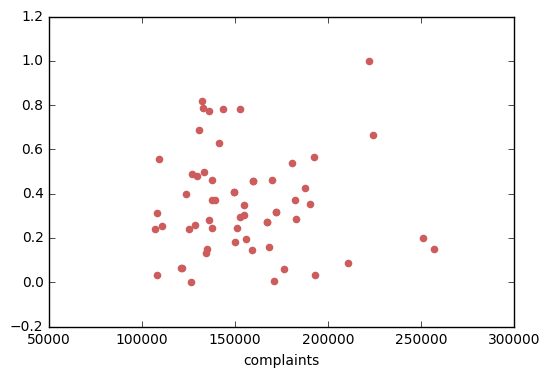

% Total Population: Male


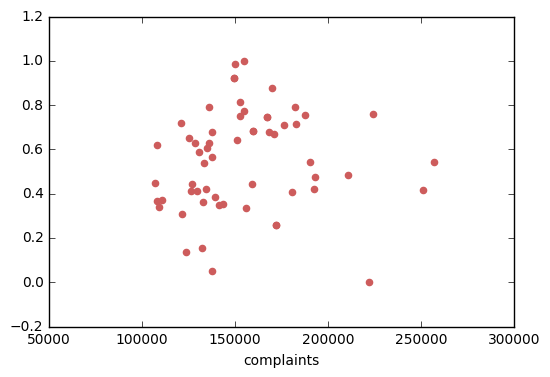

% Total Population: 18 to 24 Years


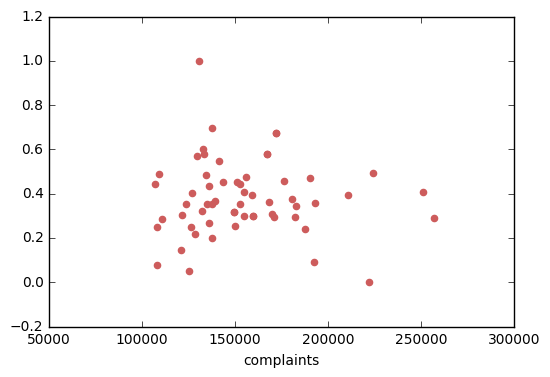

% Total Population: 25 to 34 Years


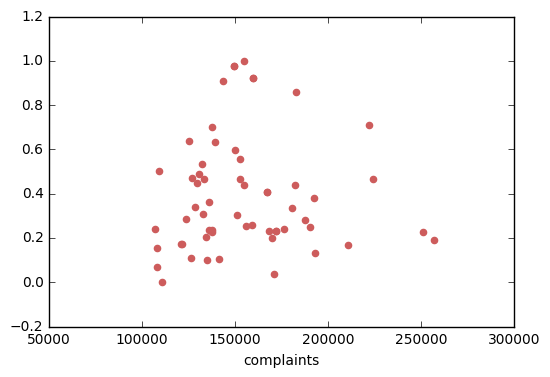

% Total Population: 35 to 44 Years


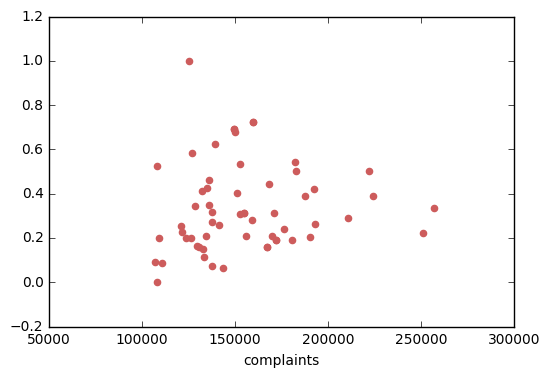

% Population 5 Years And Over: Speak Only English


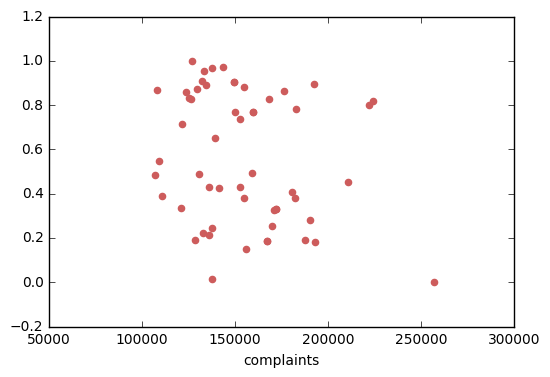

% Population 5 Years And Over: Spanish or Spanish Creole


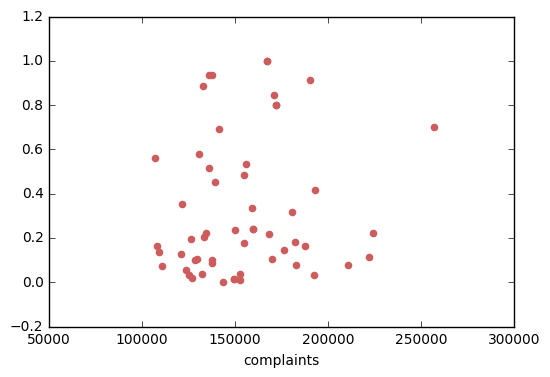

% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"


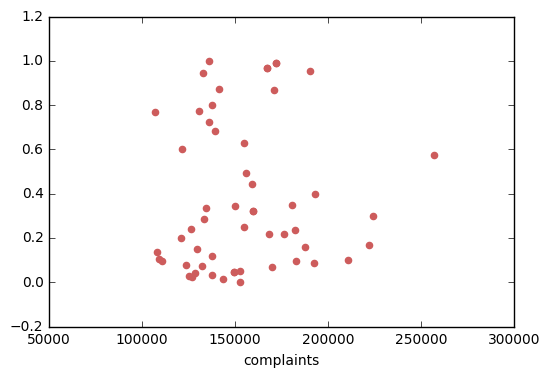

% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"


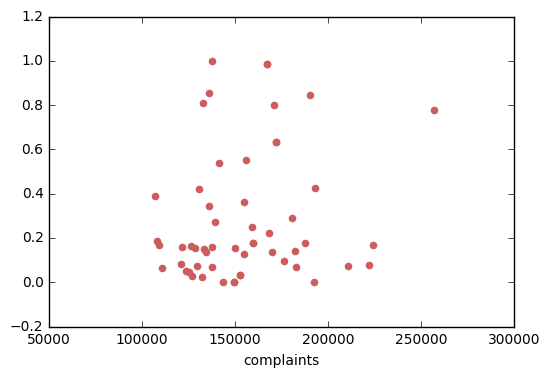

Population 25 Years and over:


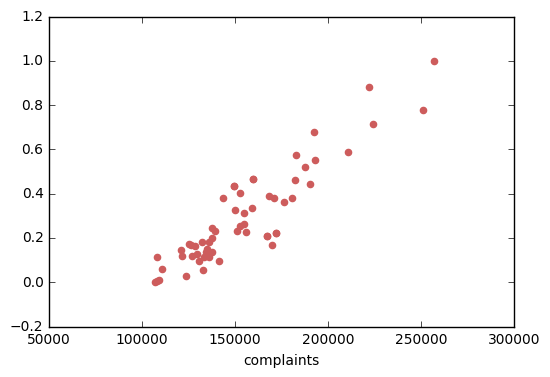

Population 25 Years and over: Less Than High School


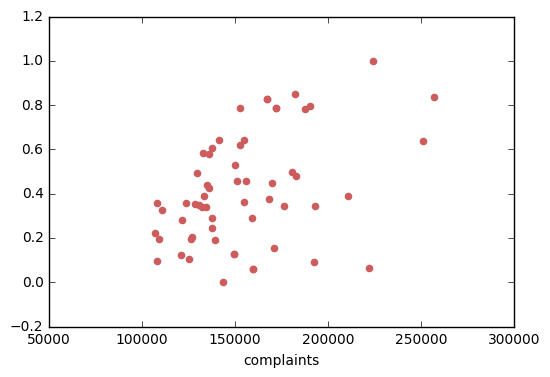

Population 25 Years and over: High School Graduate (includes equivalency)


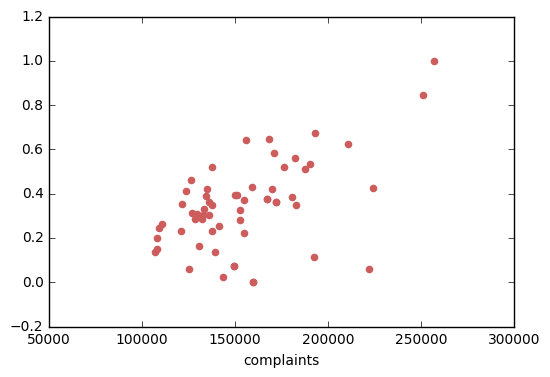

Population 25 Years and over: Some college


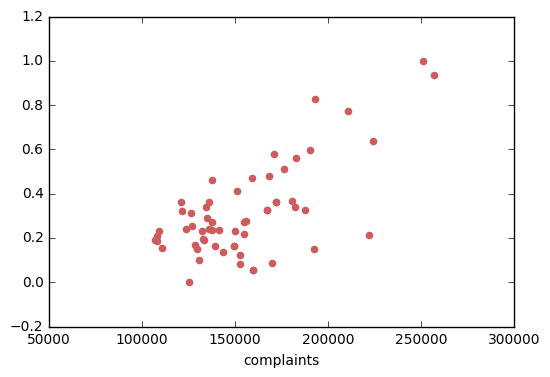

Population 25 Years and over: Bachelor's degree


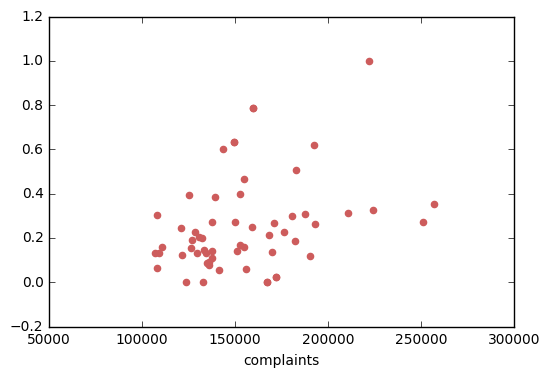

Population 25 Years and over: Master's degree


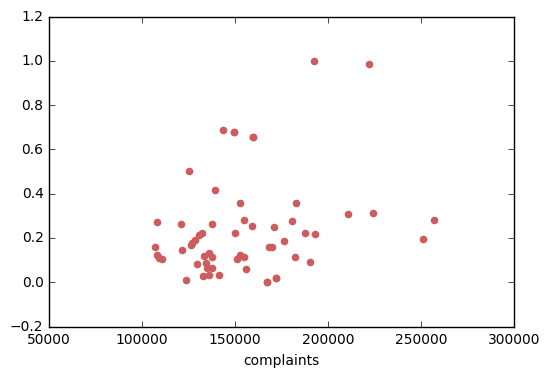

Population 25 Years and over: Professional school degree


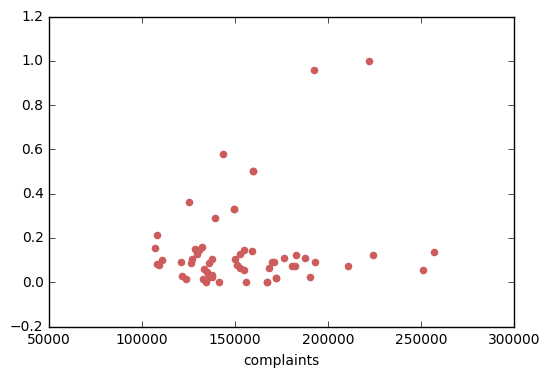

Population 25 Years and over: Doctorate degree


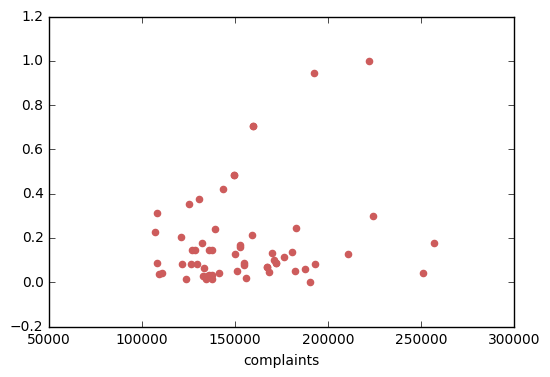

% Population 25 Years and over: Less Than High School


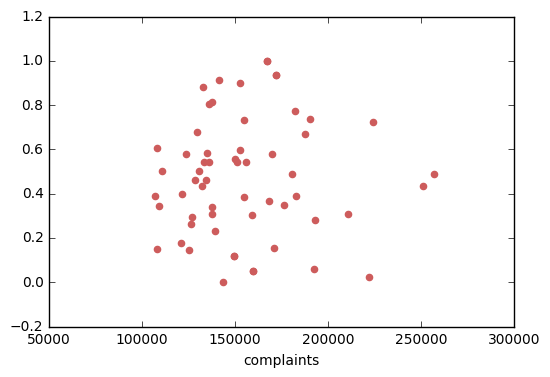

% Population 25 Years and over: High School Graduate (includes equivalency)


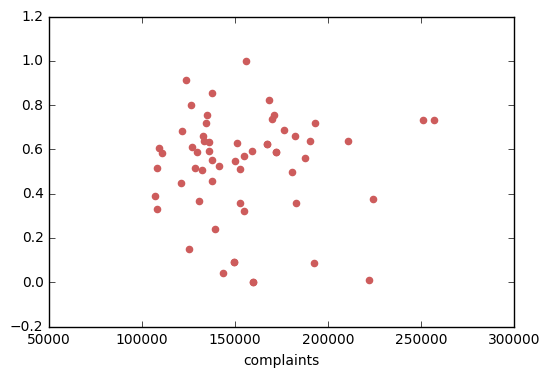

% Population 25 Years and over: Some college


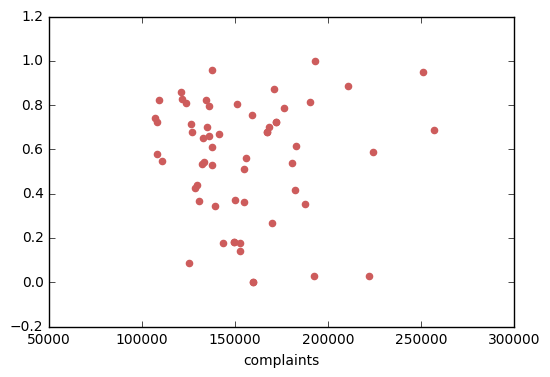

% Population 25 Years and over: Bachelor's degree


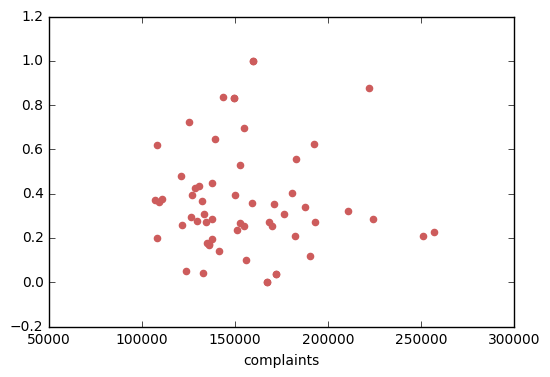

% Population 25 Years and over: Master's degree


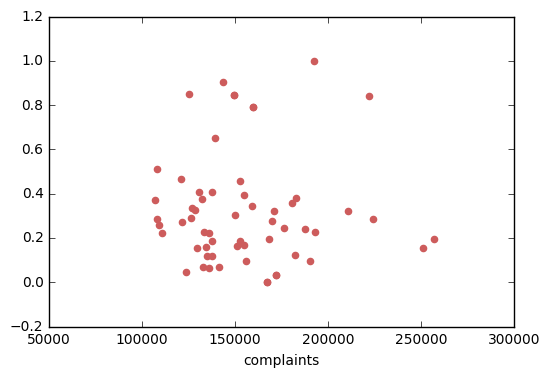

% Population 25 Years and over: Professional school degree


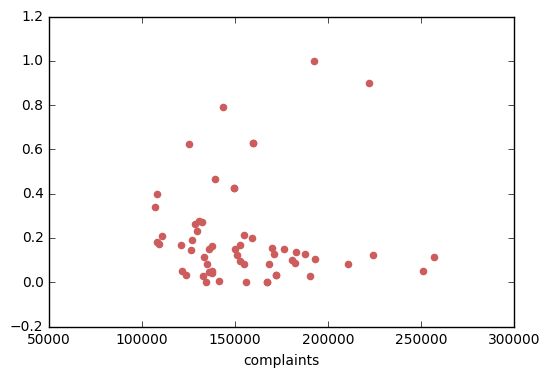

% Population 25 Years and over: Doctorate degree


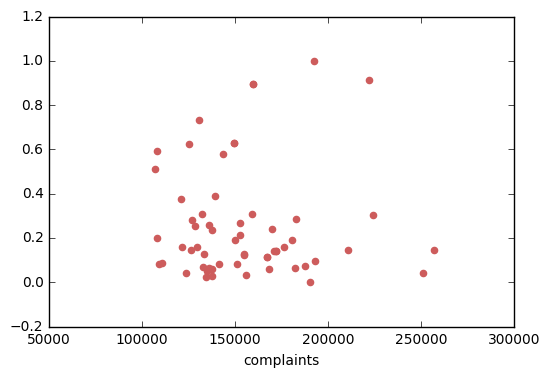

Population 25 Years and over:.1


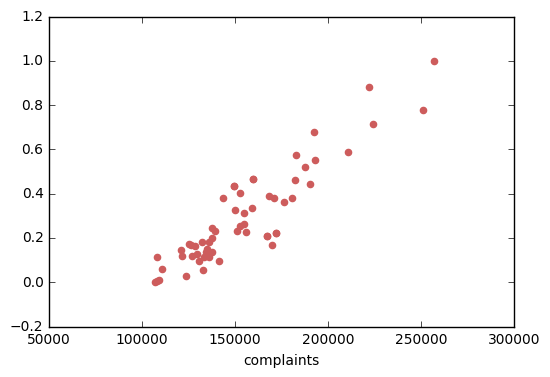

Population 25 Years and over: Less Than High School.1


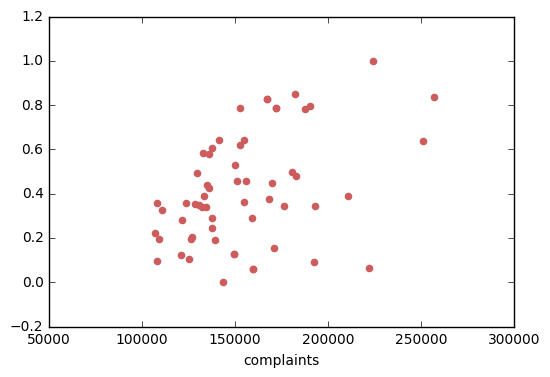

Population 25 Years and over: High School Graduate or more (includes equivalency)


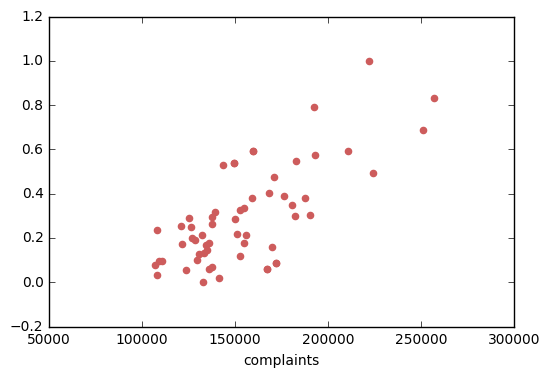

Population 25 Years and over: Some college or more


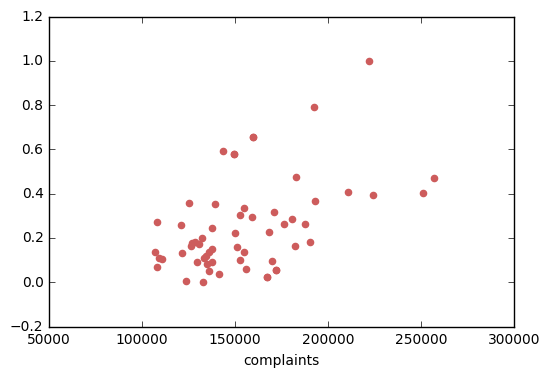

Population 25 Years and over: Bachelor's degree or more


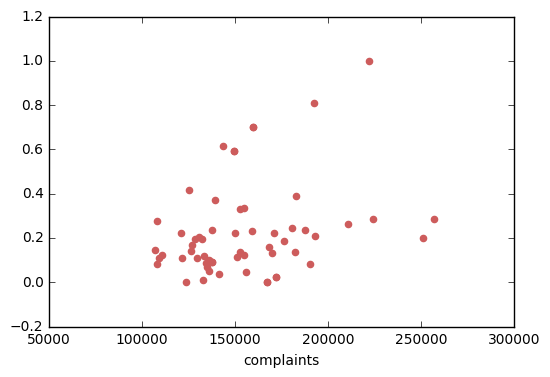

Population 25 Years and over: Master's degree or more


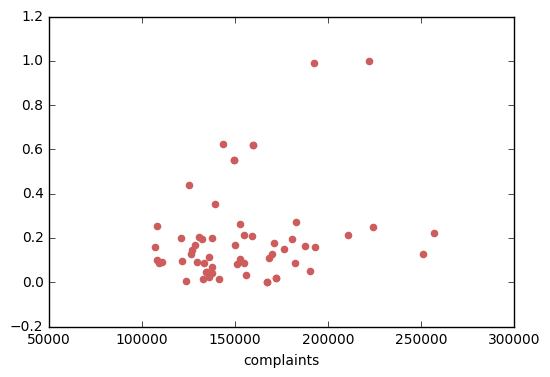

Population 25 Years and over: Professional school degree or more


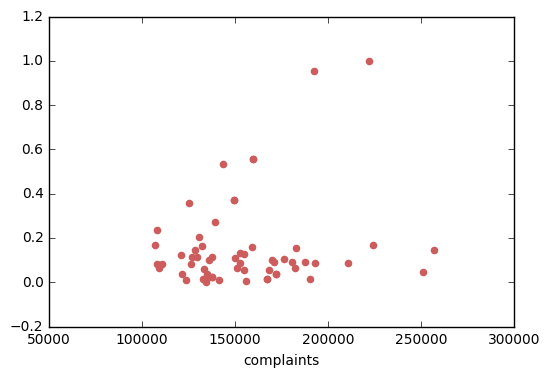

Population 25 Years and over: Doctorate degree.1


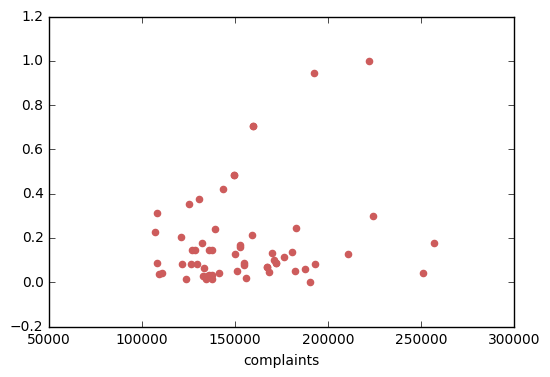

% Population 25 Years and over: Less Than High School.1


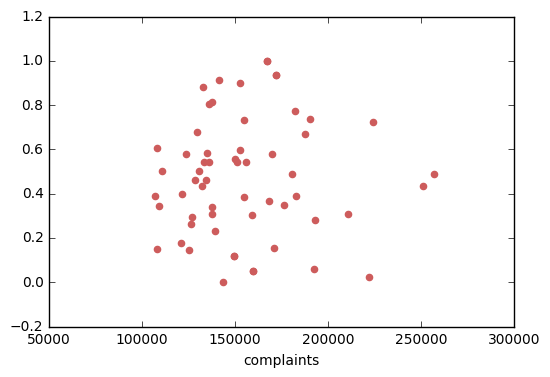

% Population 25 Years and over: High School Graduate or more (includes equivalency)


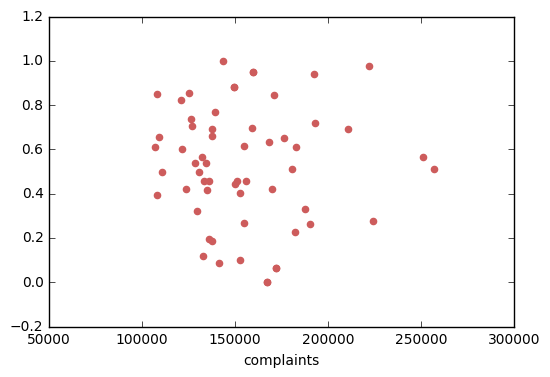

% Population 25 Years and over: Some college or more


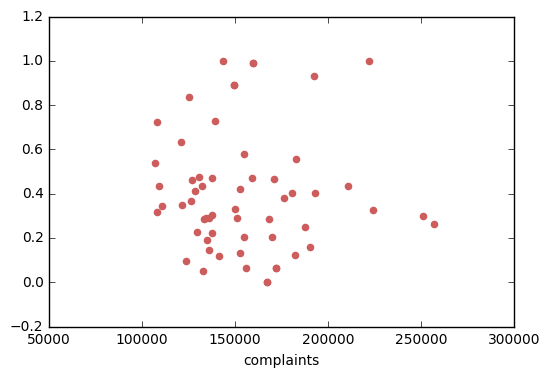

% Population 25 Years and over: Bachelor's degree or more


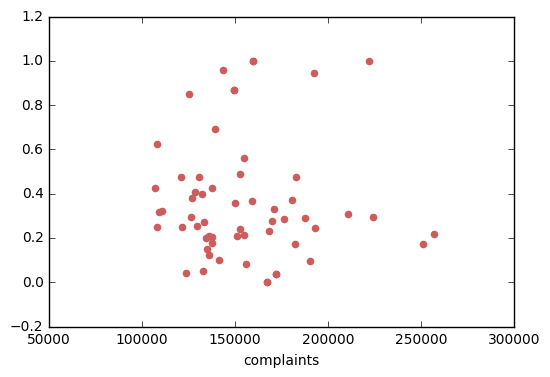

% Population 25 Years and over: Master's degree or more


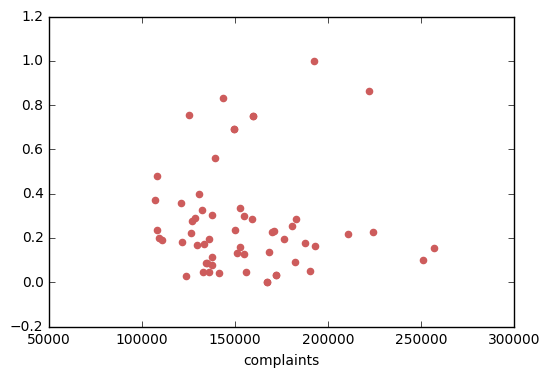

% Population 25 Years and over: Professional school degree or more


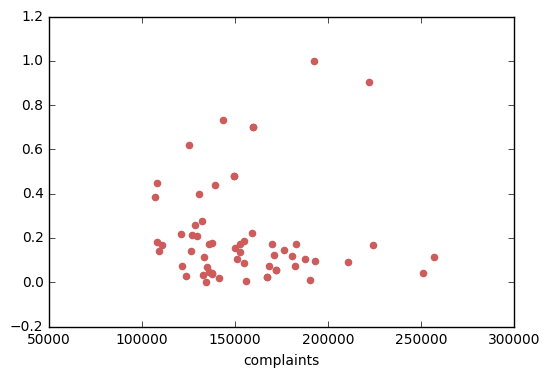

% Population 25 Years and over: Doctorate degree.1


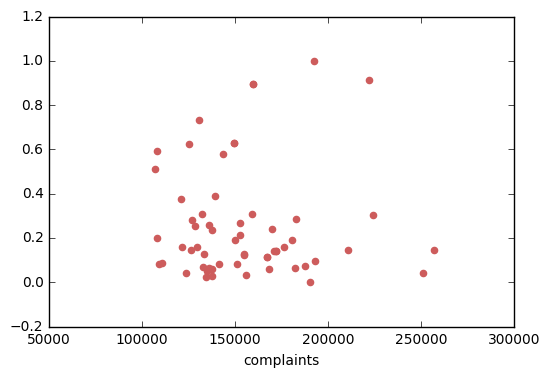

Population 3 Years and over:


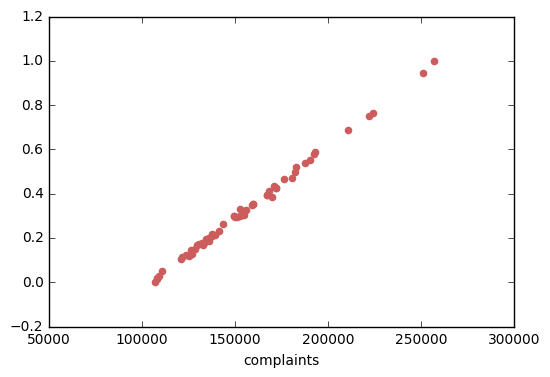

Population 3 Years and over: Enrolled in School


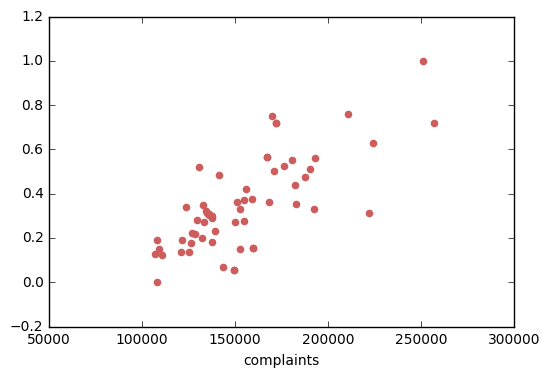

Population 3 Years and over: Not Enrolled in School


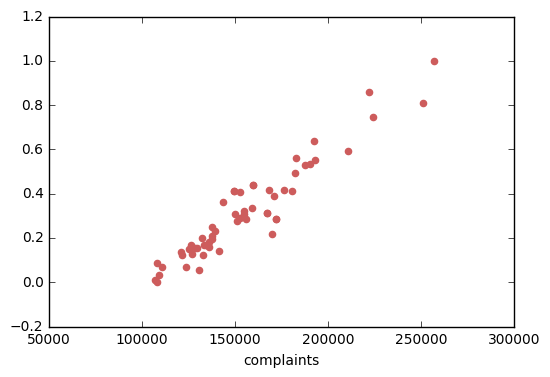

% Population 3 Years and over: Enrolled in School


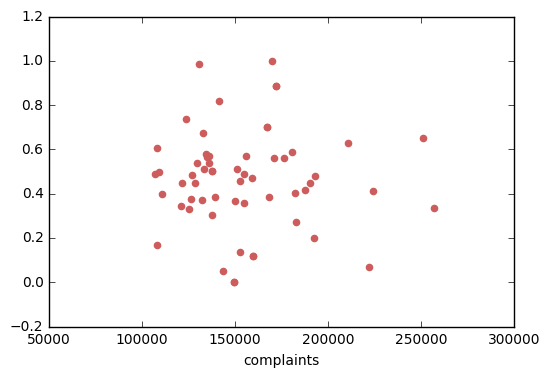

% Population 3 Years and over: Not Enrolled in School


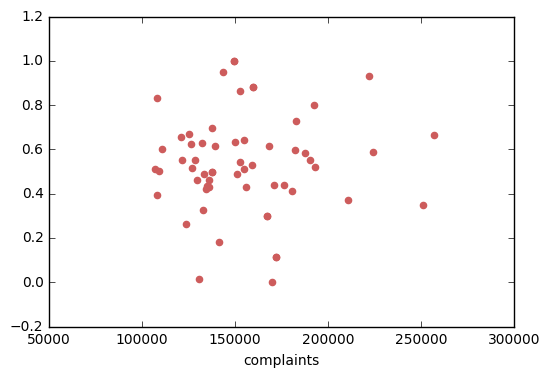

Population 3 Years and over Enrolled In School


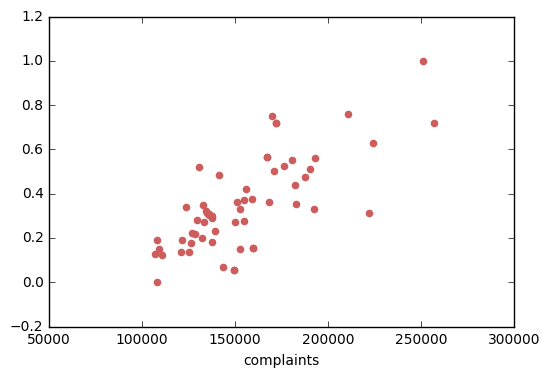

Population 3 Years and over Enrolled In School: Public School


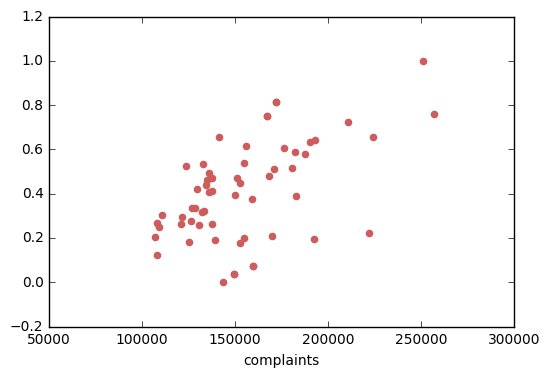

Population 3 Years and over Enrolled In School: Public School: Pre-school


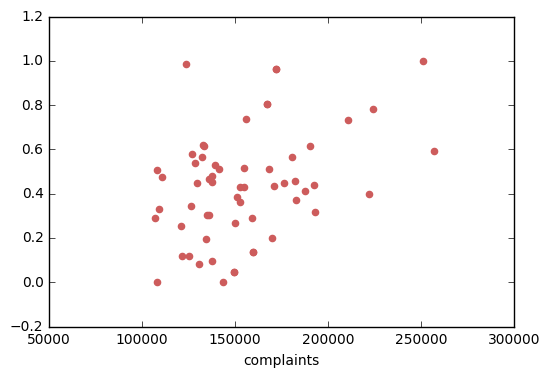

Population 3 Years and over Enrolled In School: Public School: K-8


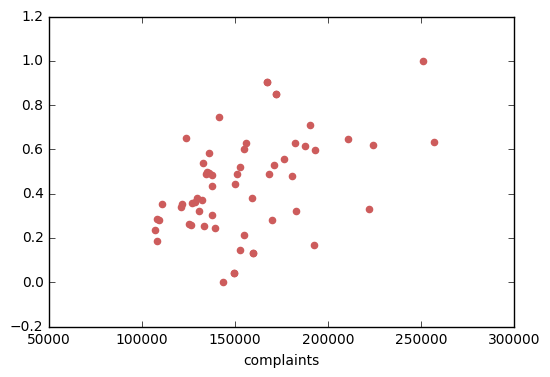

Population 3 Years and over Enrolled In School: Public School: 9-12


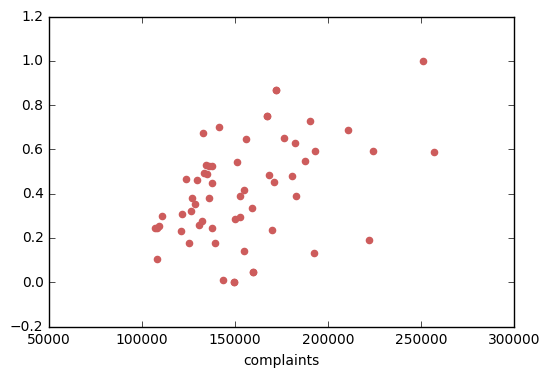

Population 3 Years and over Enrolled In School: Public School: College


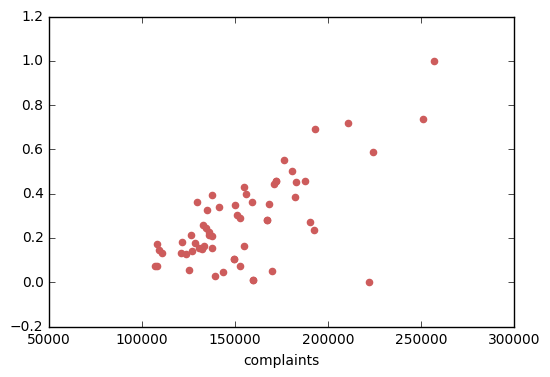

Population 3 Years and over Enrolled In School: Private School


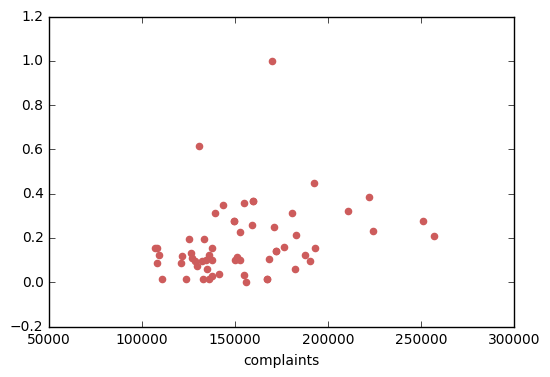

Population 3 Years and over Enrolled In School: Private School: Pre-school


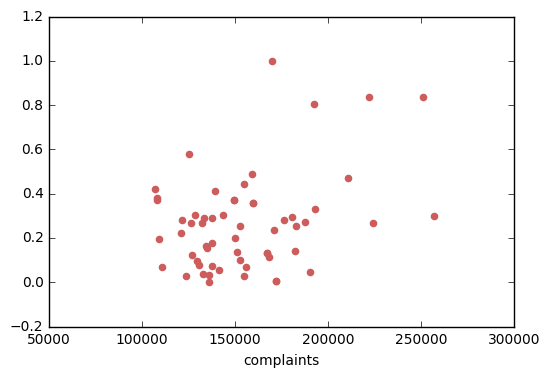

Population 3 Years and over Enrolled In School: Private School: K-8


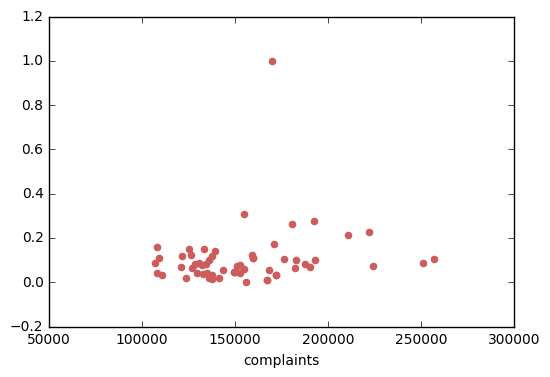

Population 3 Years and over Enrolled In School: Private School: 9-12


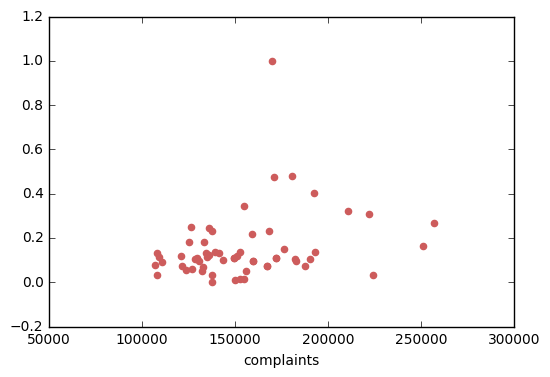

Population 3 Years and over Enrolled In School: Private School: College


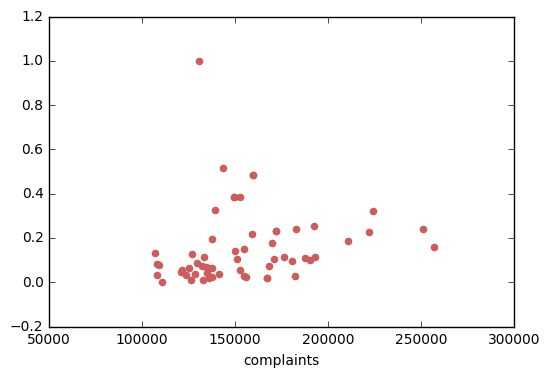

% Population 3 Years and over Enrolled In School: Public School


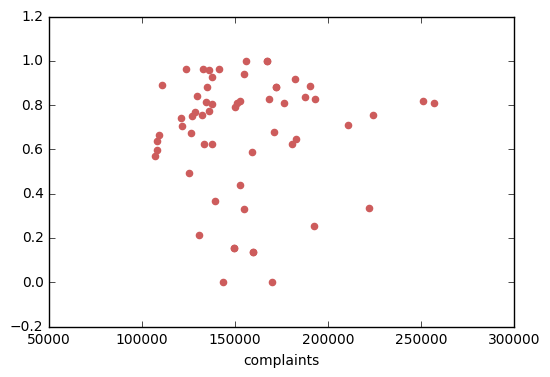

% Population 3 Years and over Enrolled In School: Public School: Pre-school


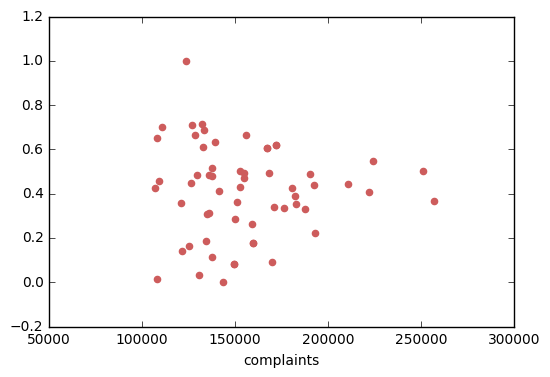

% Population 3 Years and over Enrolled In School: Public School: K-8


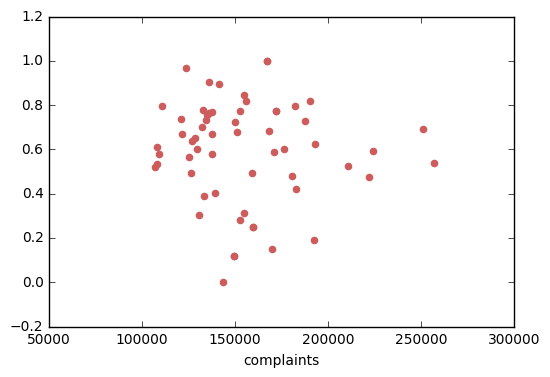

% Population 3 Years and over Enrolled In School: Public School: 9-12


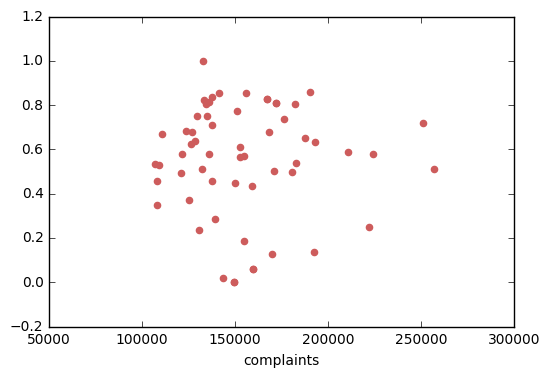

% Population 3 Years and over Enrolled In School: Public School: College


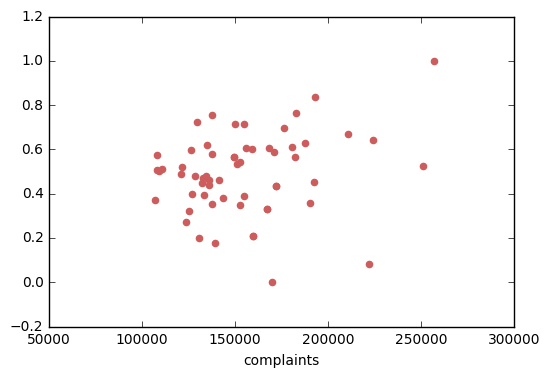

% Population 3 Years and over Enrolled In School: Private School


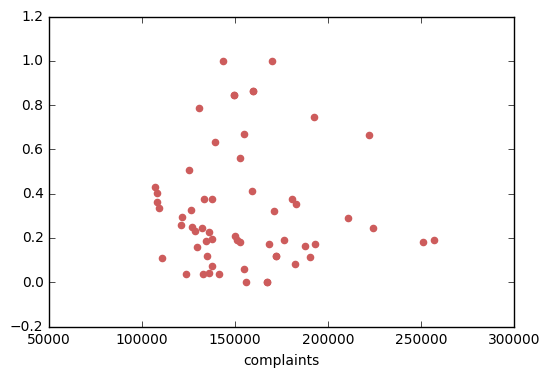

% Population 3 Years and over Enrolled In School: Private School: Pre-school


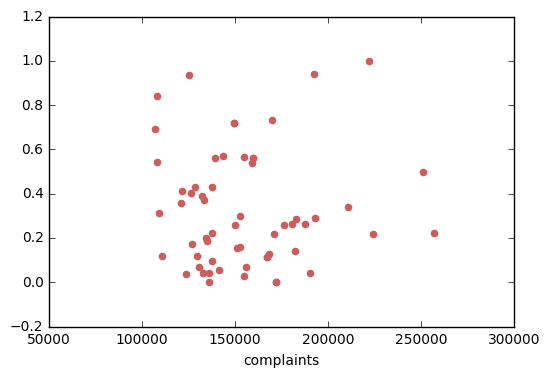

% Population 3 Years and over Enrolled In School: Private School: K-8


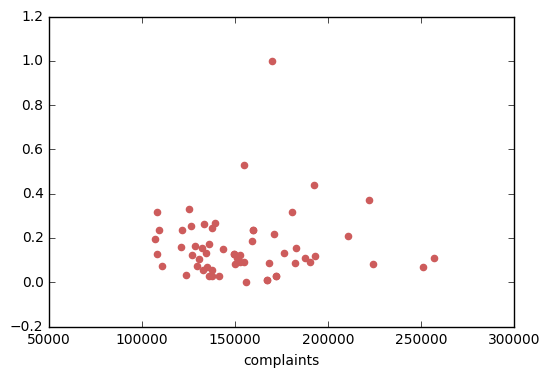

% Population 3 Years and over Enrolled In School: Private School: 9-12


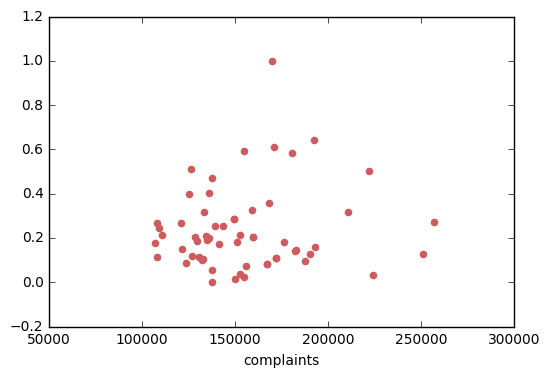

% Population 3 Years and over Enrolled In School: Private School: College


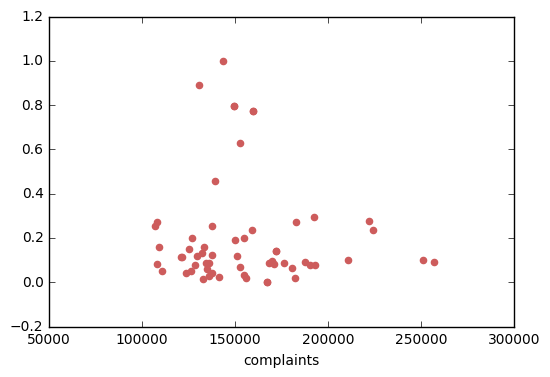

Employed civilian Population 16 Years and over:


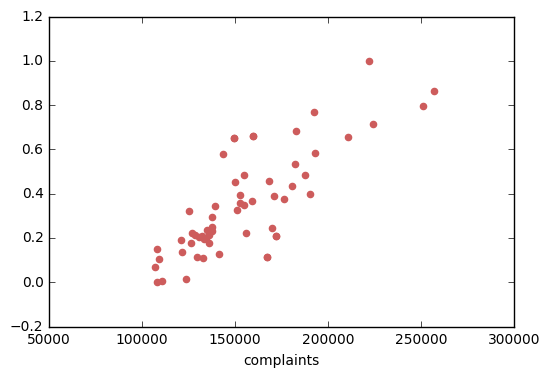

Employed civilian Population 16 Years and over: Management, business, and financial operations  occupations


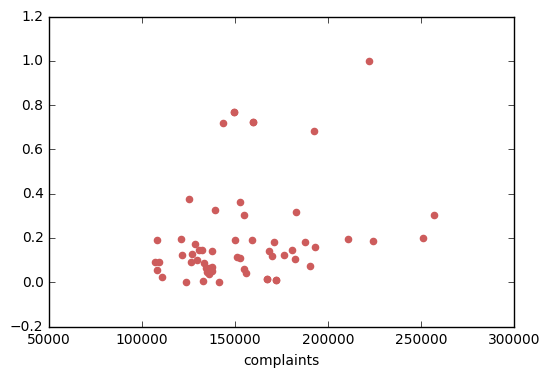

Employed civilian Population 16 Years and over: Professional and related occupations


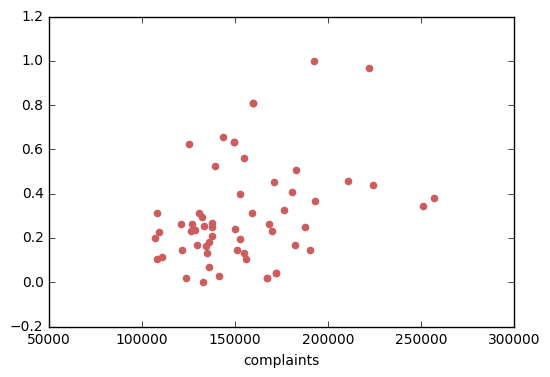

Employed civilian Population 16 Years and over: Healthcare support occupations


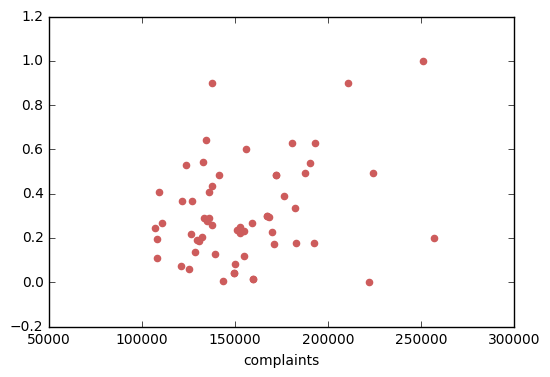

Employed civilian Population 16 Years and over: Protective service occupations


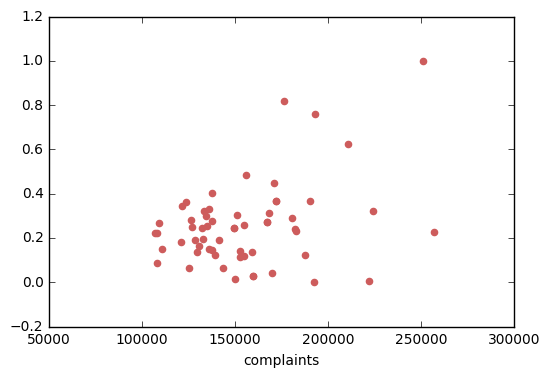

Employed civilian Population 16 Years and over: Food preparation and serving related occupations


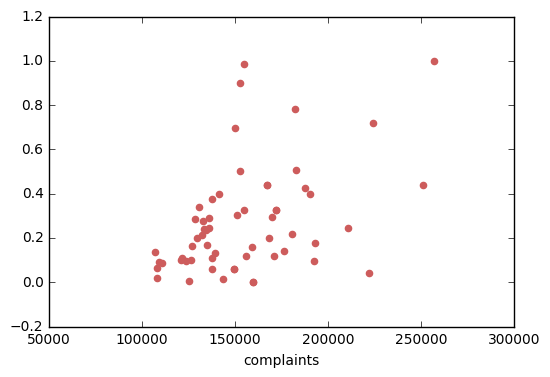

Employed civilian Population 16 Years and over: Building and grounds cleaning and maintenance  occupations


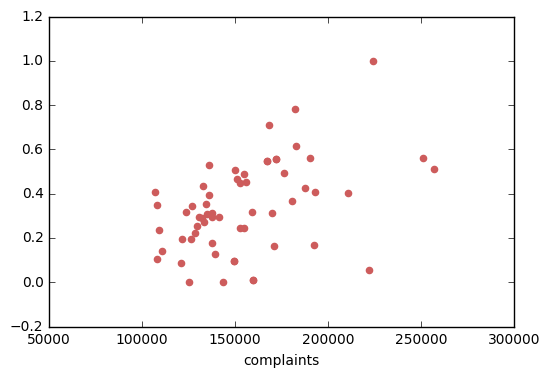

Employed civilian Population 16 Years and over: Personal care and service occupations


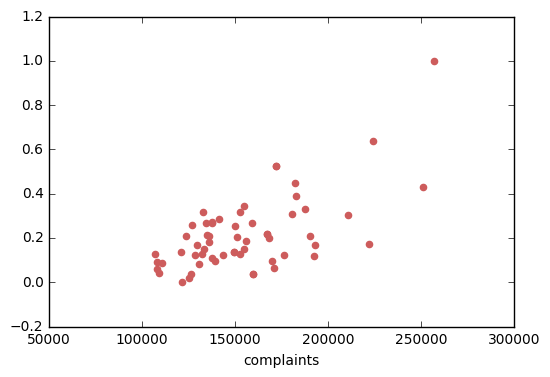

Employed civilian Population 16 Years and over: Sales and related occupations


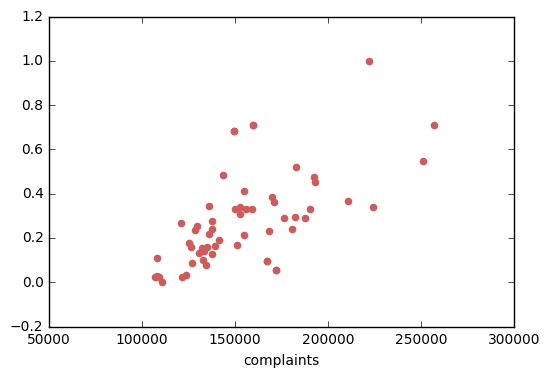

Employed civilian Population 16 Years and over: Office and administrative support occupations


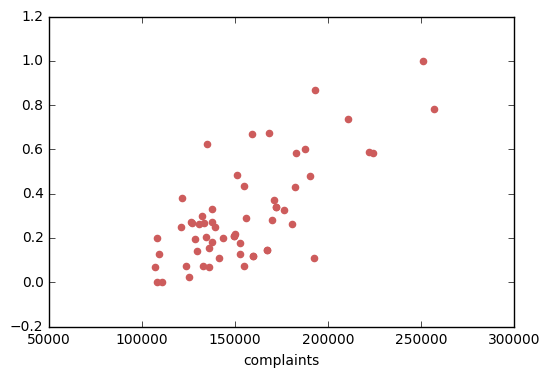

Employed civilian Population 16 Years and over: Farming, fishing, and forestry occupations


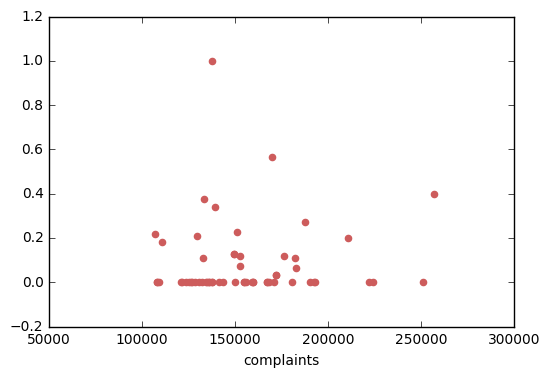

Employed civilian Population 16 Years and over: Construction, extraction, and maintenance  occupations


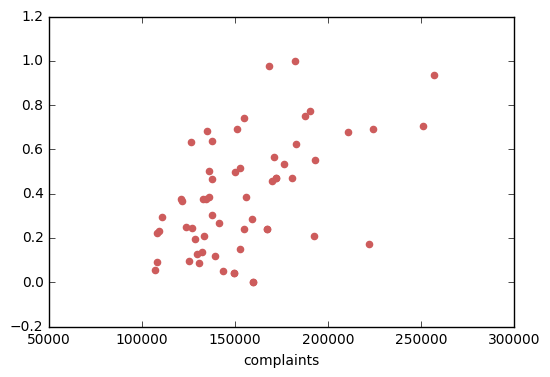

Employed civilian Population 16 Years and over: Production occupations


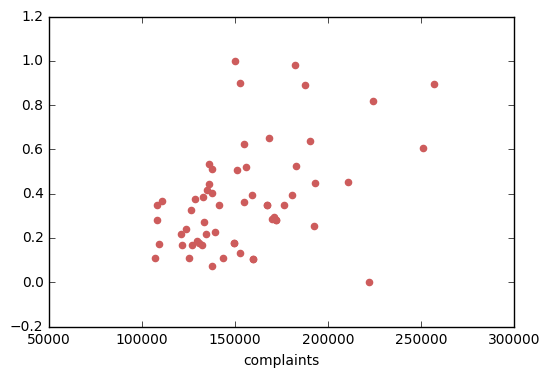

Employed civilian Population 16 Years and over: Transportation and material moving occupations


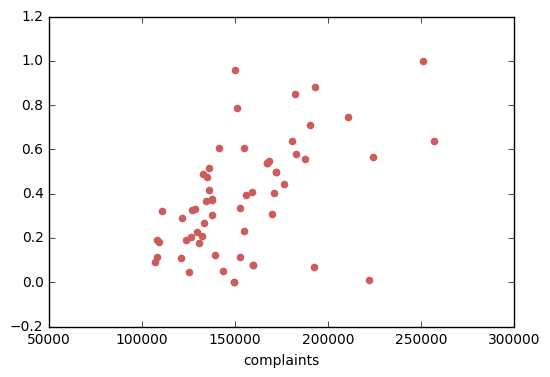

% Employed civilian Population 16 Years and over: Management, business, and financial operations  occupations


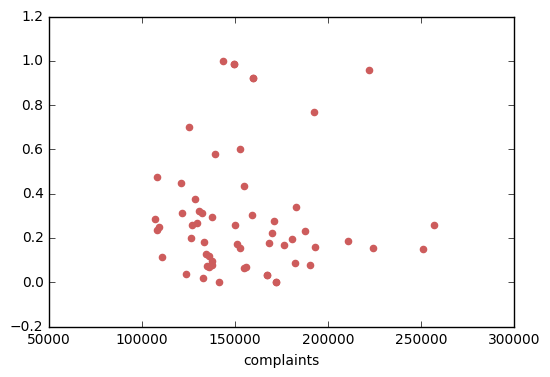

% Employed civilian Population 16 Years and over: Professional and related occupations


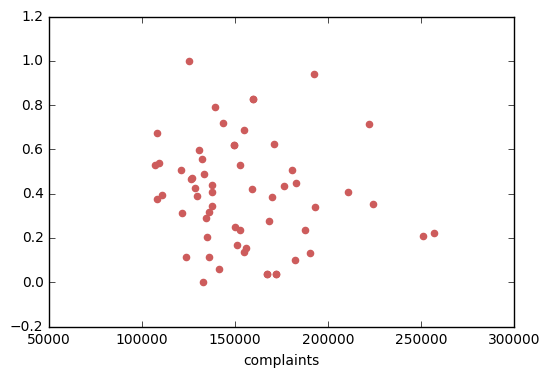

% Employed civilian Population 16 Years and over: Healthcare support occupations


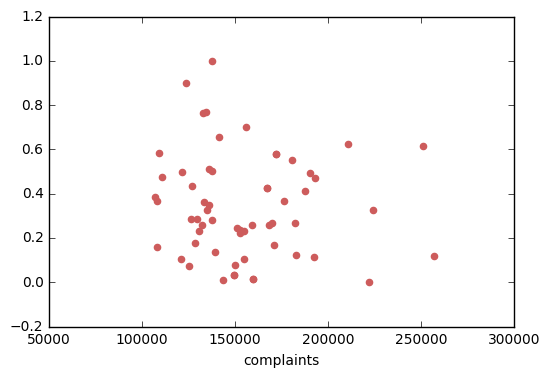

% Employed civilian Population 16 Years and over: Protective service occupations


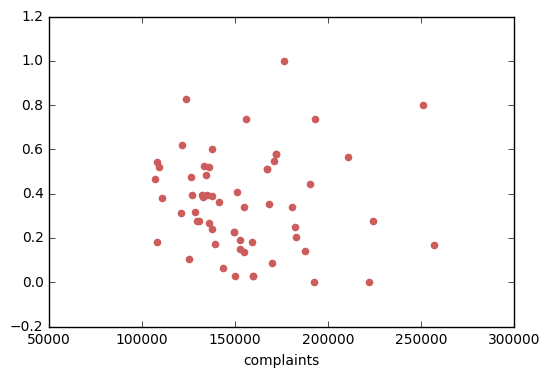

% Employed civilian Population 16 Years and over: Food preparation and serving related occupations


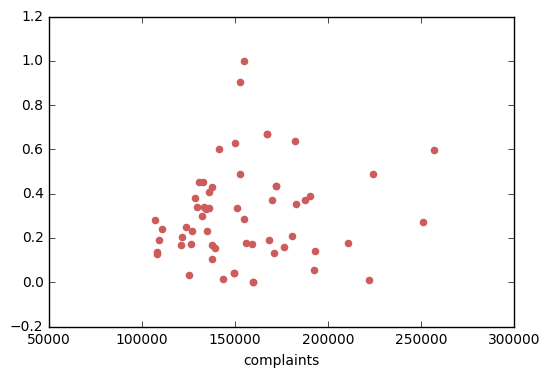

% Employed civilian Population 16 Years and over: Building and grounds cleaning and maintenance  occupations


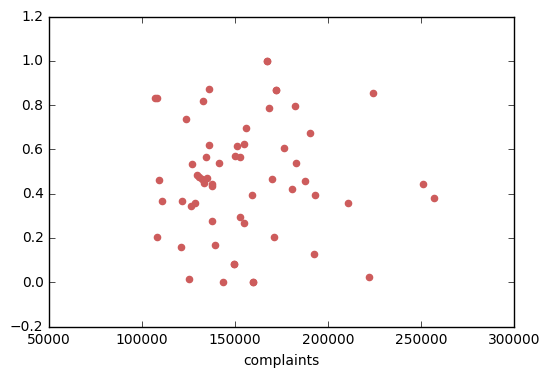

% Employed civilian Population 16 Years and over: Personal care and service occupations


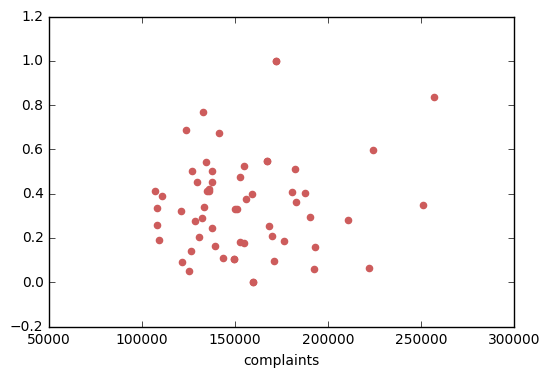

% Employed civilian Population 16 Years and over: Sales and related occupations


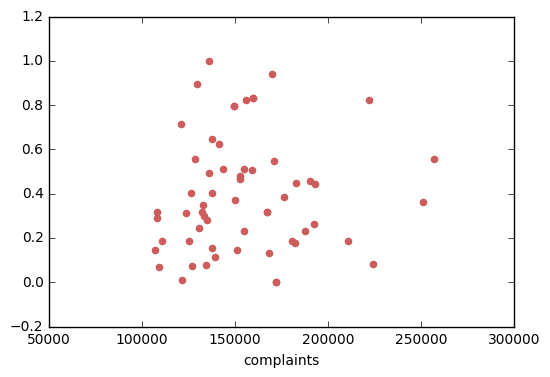

% Employed civilian Population 16 Years and over: Office and administrative support occupations


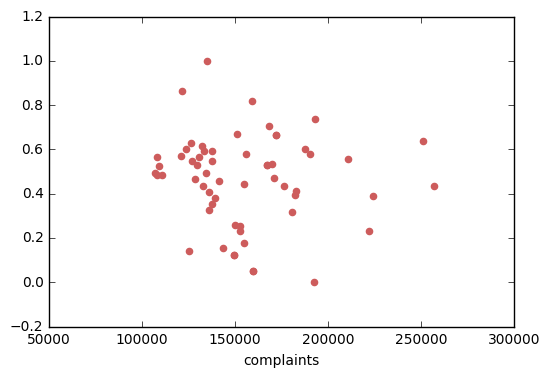

% Employed civilian Population 16 Years and over: Farming, fishing, and forestry occupations


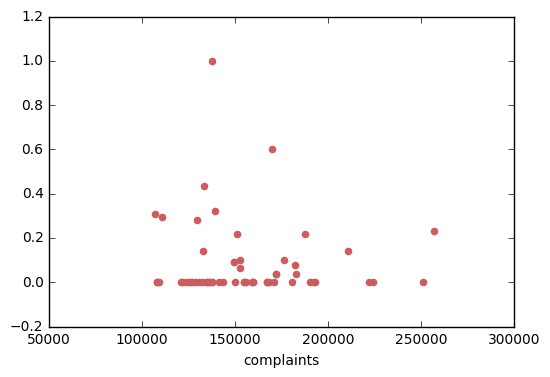

% Employed civilian Population 16 Years and over: Construction, extraction, and maintenance  occupations


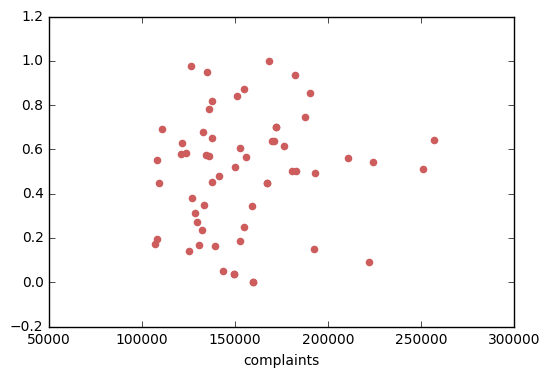

% Employed civilian Population 16 Years and over: Production occupations


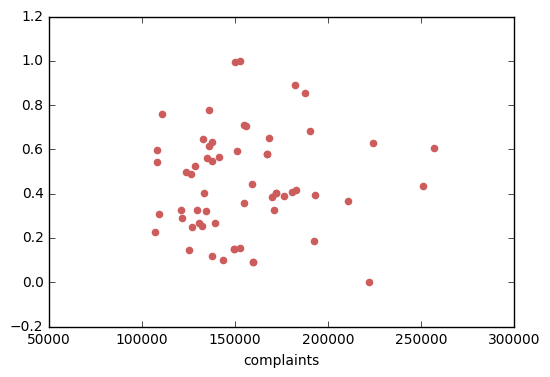

% Employed civilian Population 16 Years and over: Transportation and material moving occupations


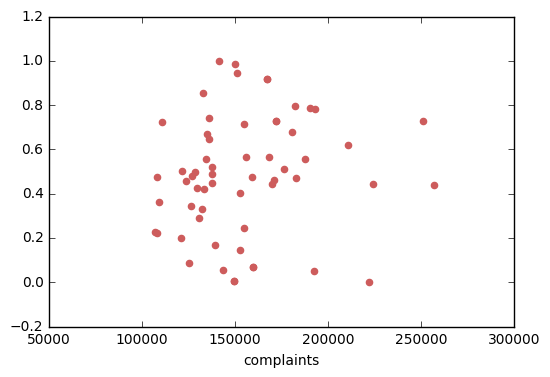

Employed Civilian Population 16 Years And Over:


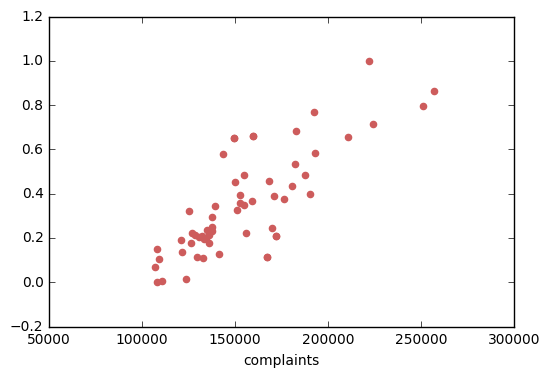

Employed Civilian Population 16 Years And Over: Private Sector


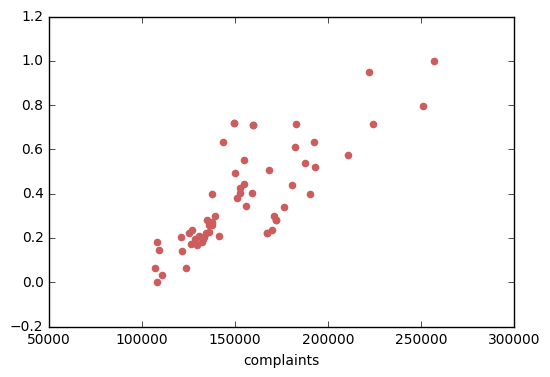

Employed Civilian Population 16 Years And Over: Public Sector


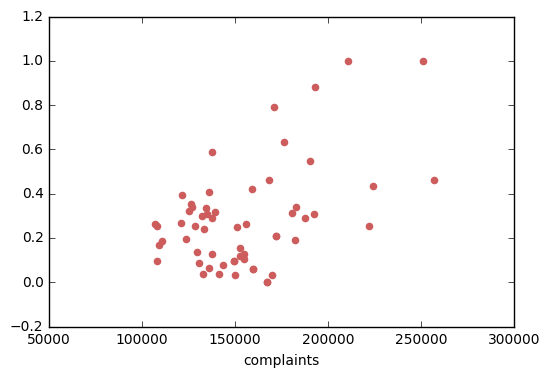

Employed Civilian Population 16 Years And Over: Self-Employed (incorporated and not incorporated)


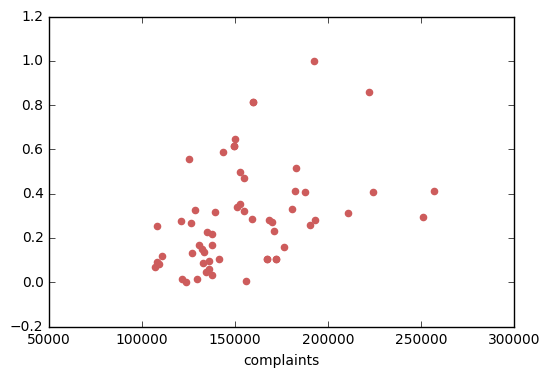

Employed Civilian Population 16 Years And Over: Private Non-Profit


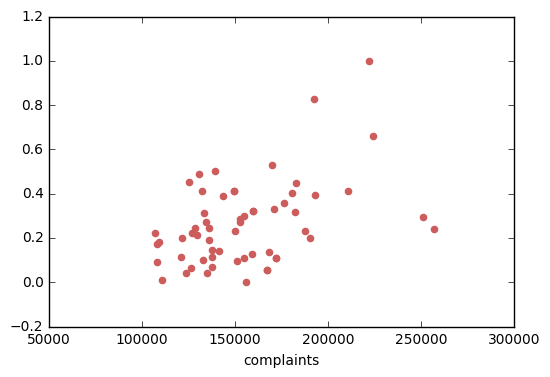

Employed Civilian Population 16 Years And Over: Unpaid Family Workers


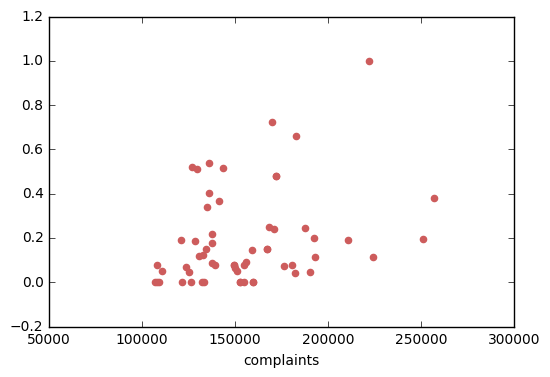

% Employed Civilian Population 16 Years And Over: Private Sector


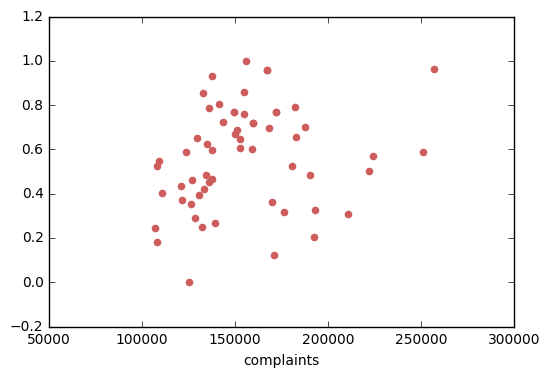

% Employed Civilian Population 16 Years And Over: Public Sector


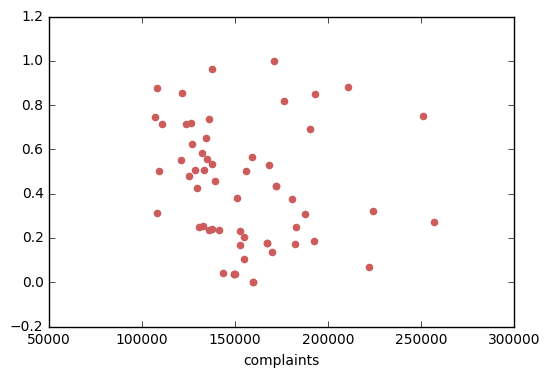

% Employed Civilian Population 16 Years And Over: Self-Employed (incorporated and not incorporated)


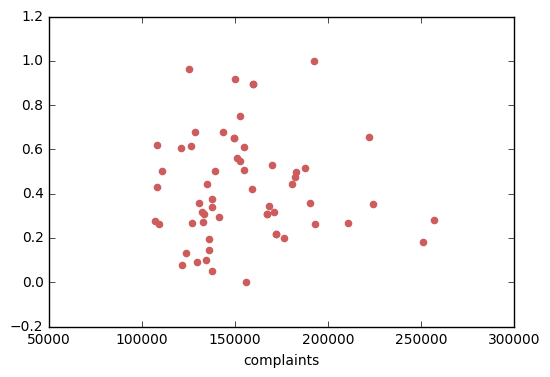

% Employed Civilian Population 16 Years And Over: Private Non-Profit


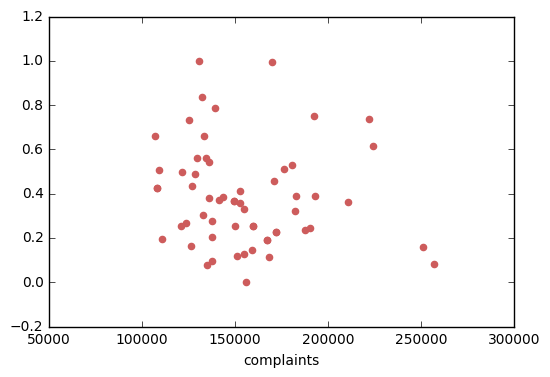

% Employed Civilian Population 16 Years And Over: Unpaid Family Workers


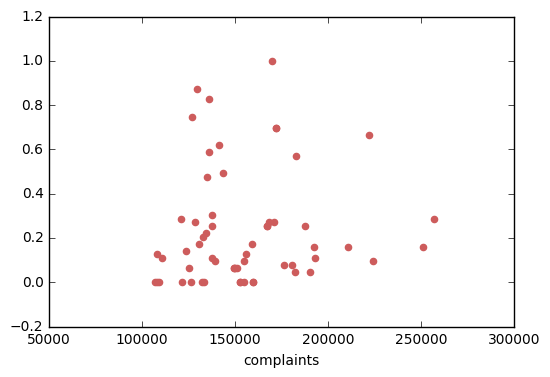

Households:


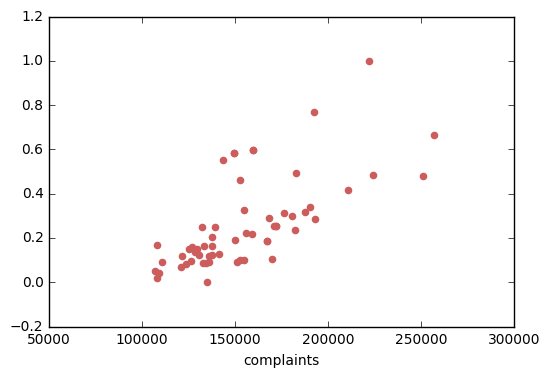

Households: Less than $10,000


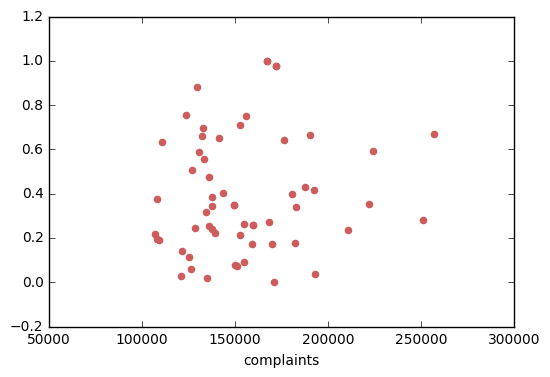

Households: $10,000 to $14,999


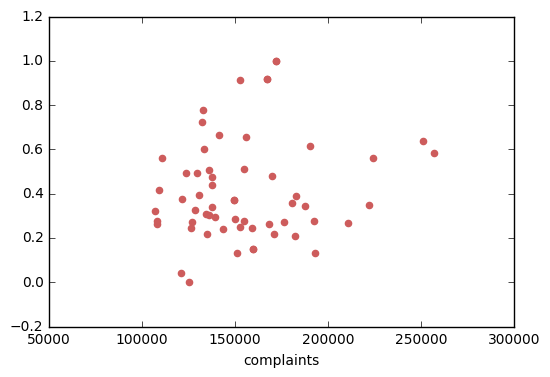

Households: $15,000 to $19,999


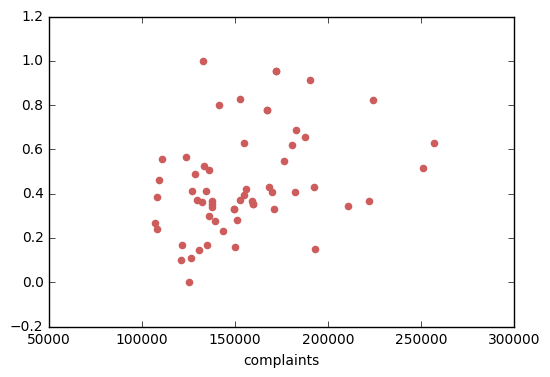

Households: $20,000 to $24,999


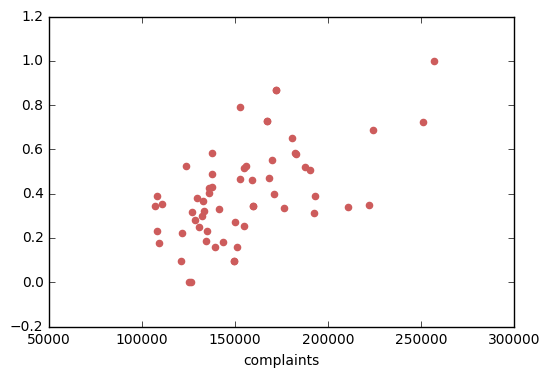

Households: $25,000 to $29,999


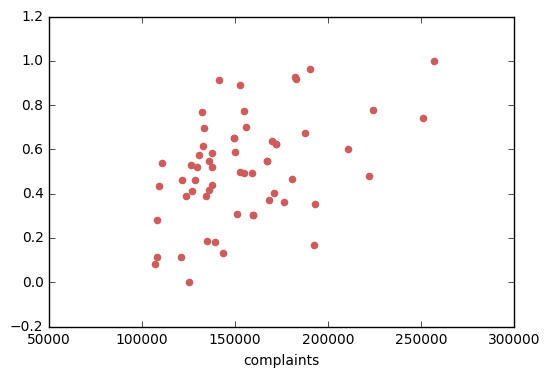

Households: $30,000 to $34,999


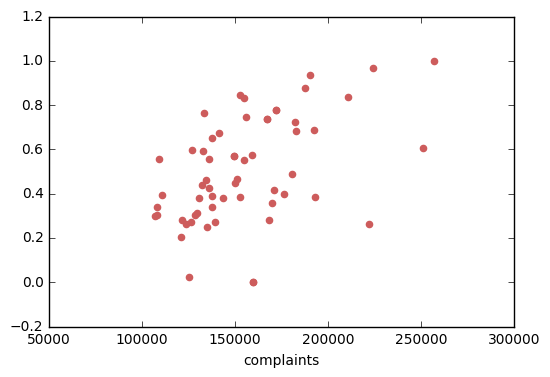

Households: $35,000 to $39,999


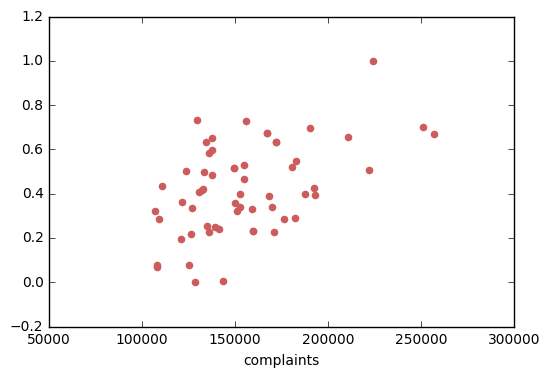

Households: $40,000 to $44,999


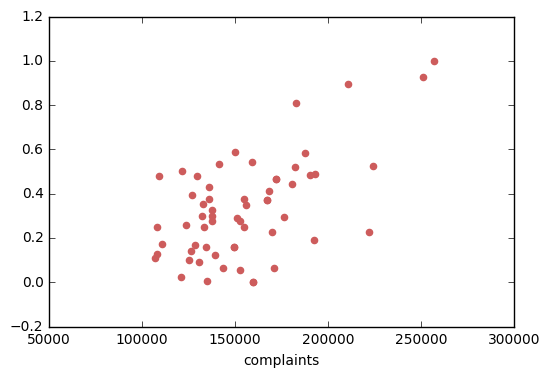

Households: $45,000 to $49,999


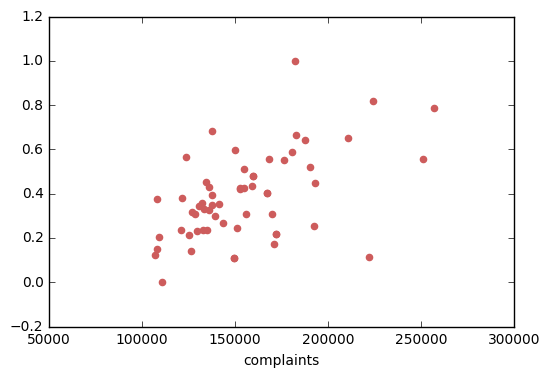

Households: $50,000 to $59,999


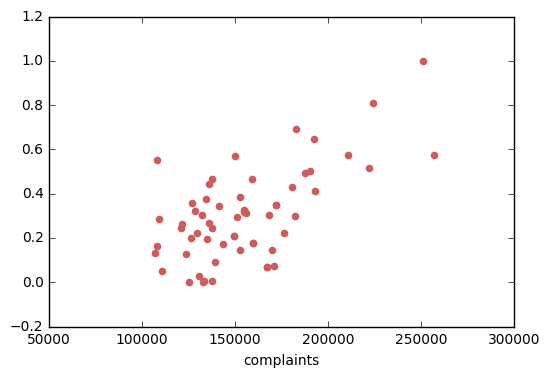

Households: $60,000 to $74,999


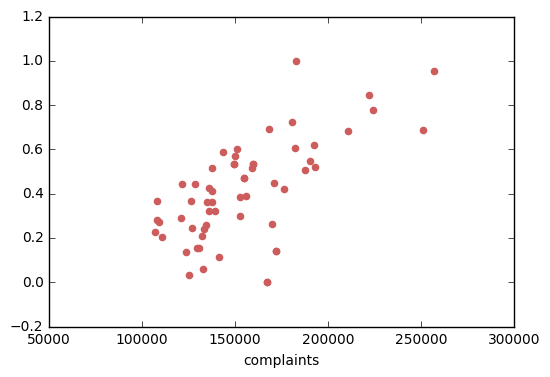

Households: $75,000 to $99,999


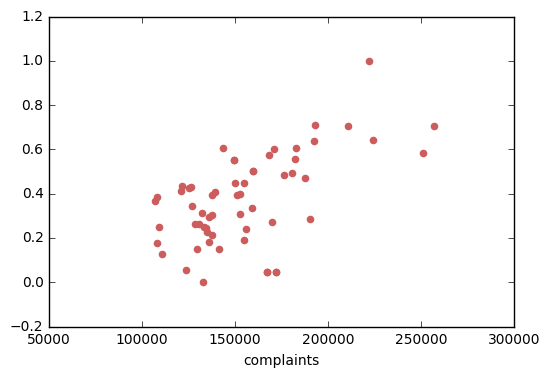

Households: $100,000 to $124,999


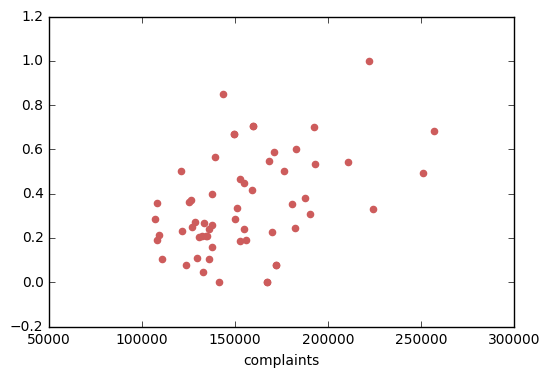

Households: $125,000 to $149,999


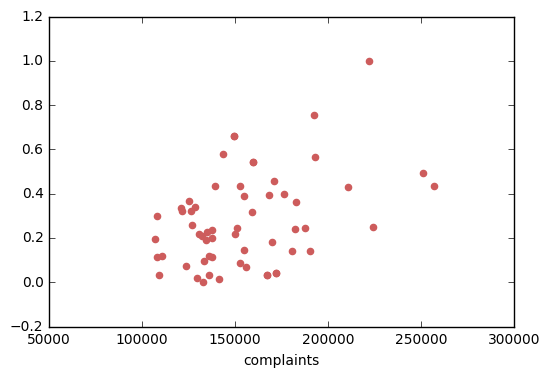

Households: $150,000 to $199,999


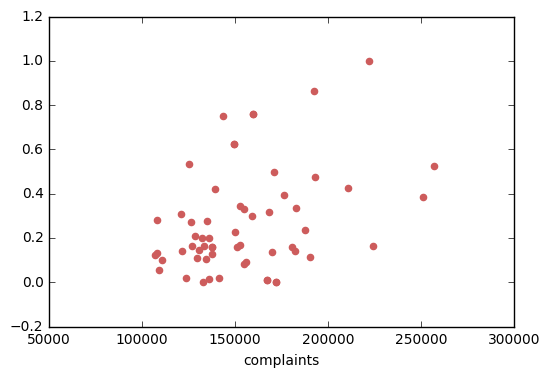

Households: $200,000 or More


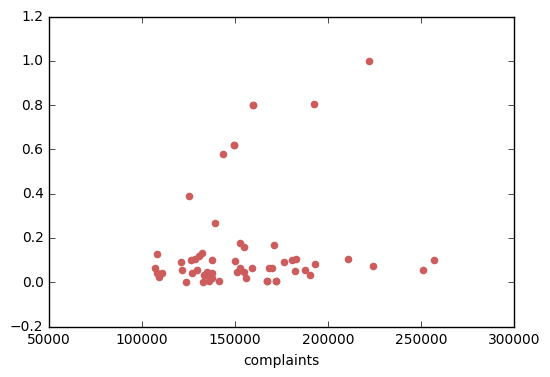

% Households: Less than $10,000


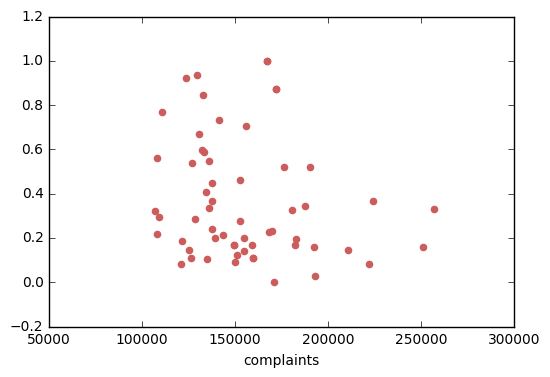

% Households: $10,000 to $14,999


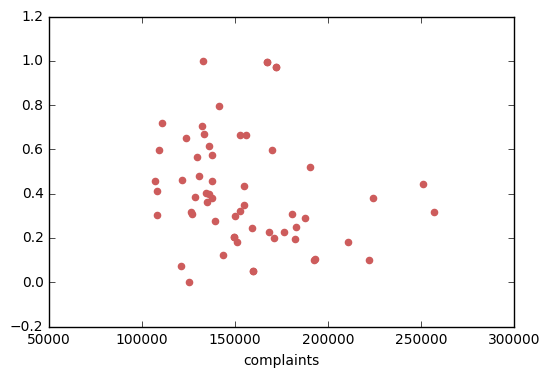

% Households: $15,000 to $19,999


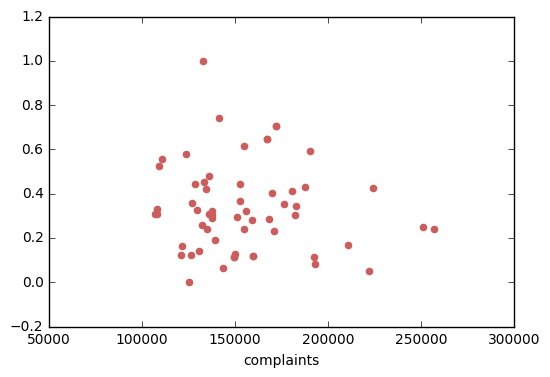

% Households: $20,000 to $24,999


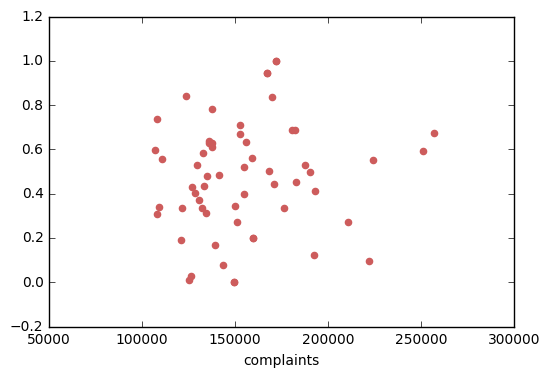

% Households: $25,000 to $29,999


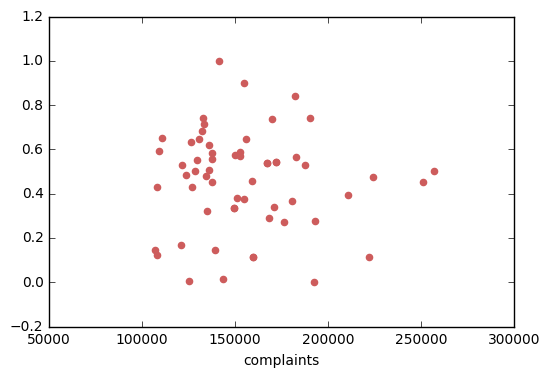

% Households: $30,000 to $34,999


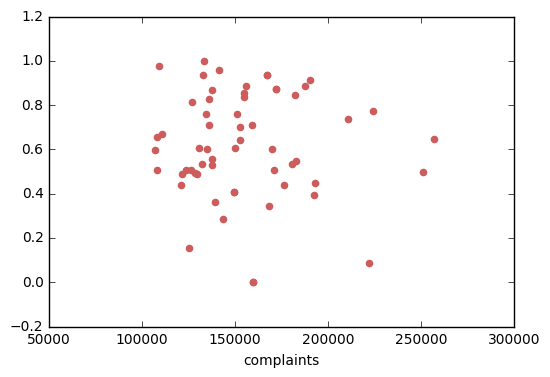

% Households: $35,000 to $39,999


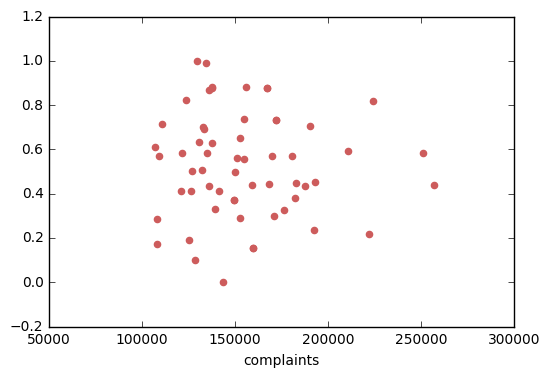

% Households: $40,000 to $44,999


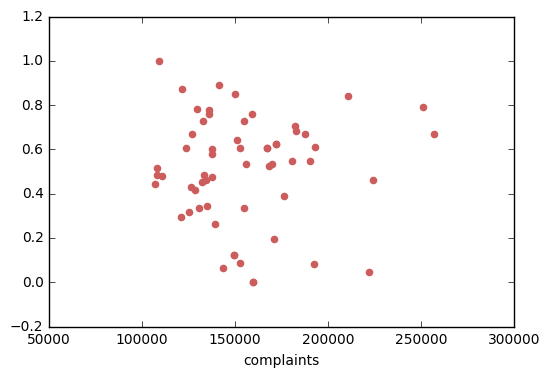

% Households: $45,000 to $49,999


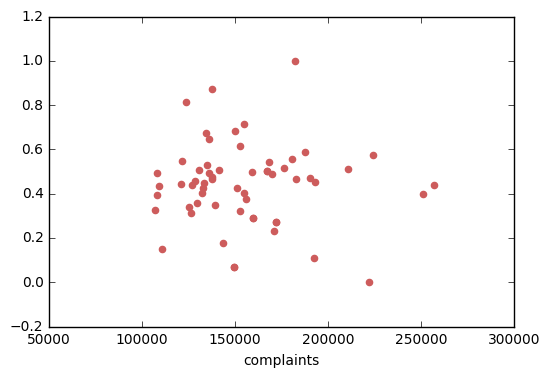

% Households: $50,000 to $59,999


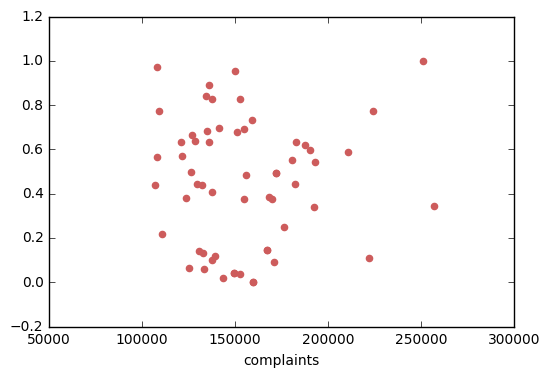

% Households: $60,000 to $74,999


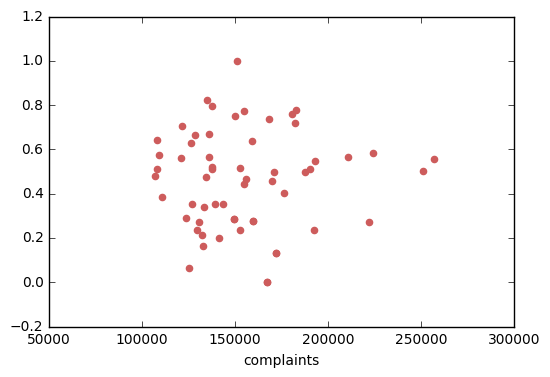

% Households: $75,000 to $99,999


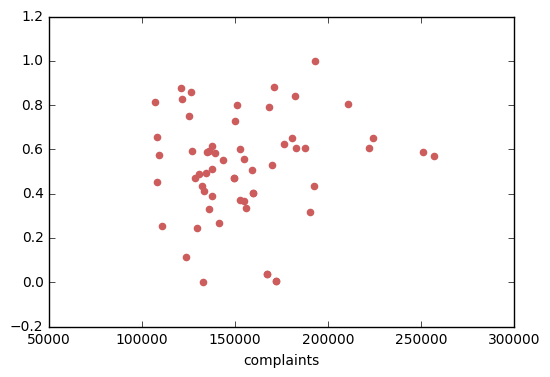

% Households: $100,000 to $124,999


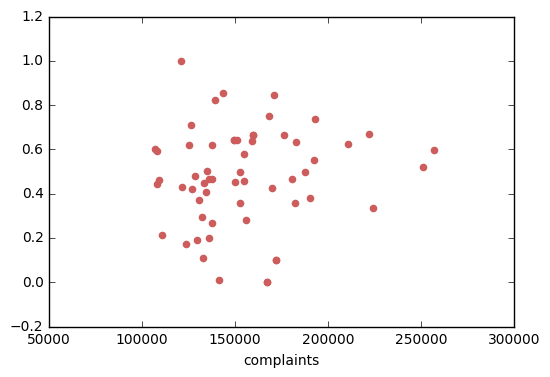

% Households: $125,000 to $149,999


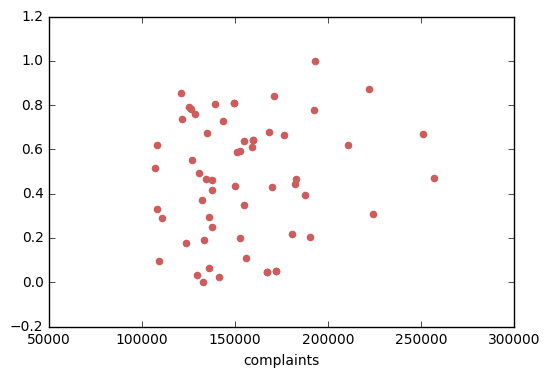

% Households: $150,000 to $199,999


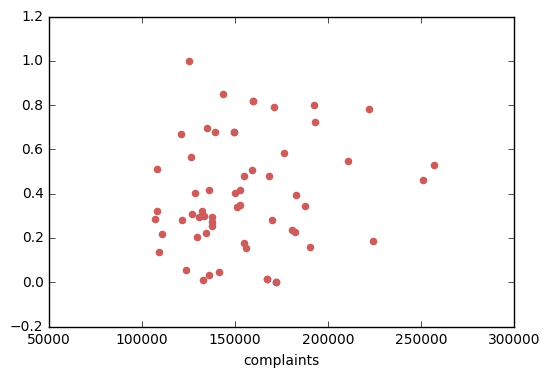

% Households: $200,000 or More


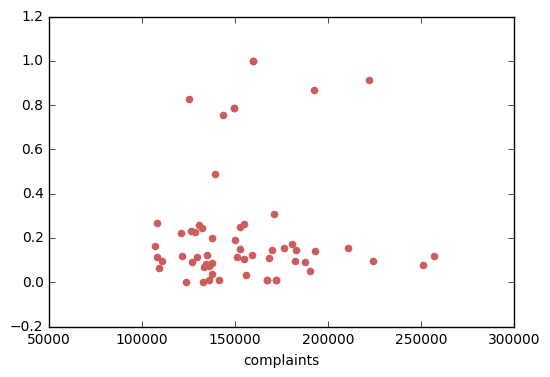

Median household income (In 2014 Inflation Adjusted Dollars)


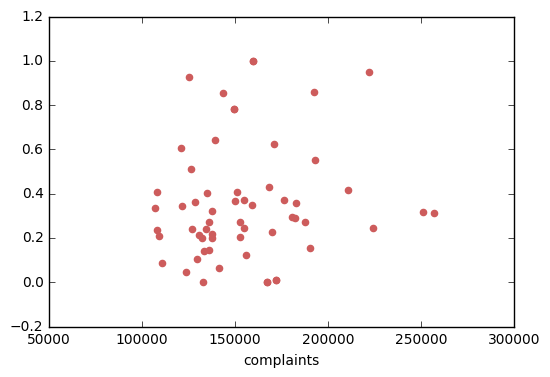

Per capita income (In 2014 Inflation Adjusted Dollars)


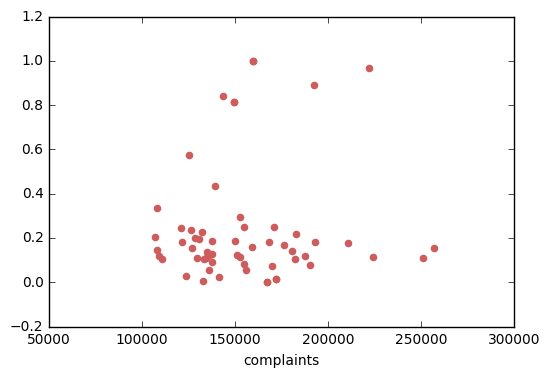

Employed Civilian Population 16 Years And Over:.1


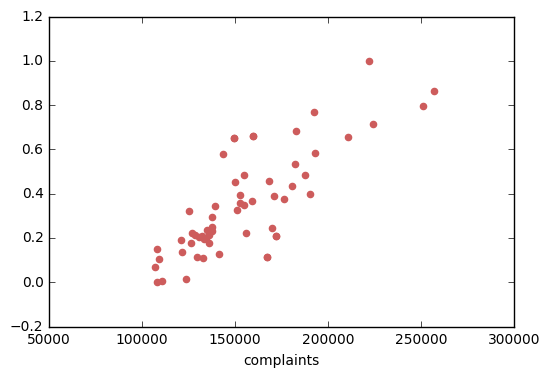

Employed Civilian Population 16 Years And Over: Management, professional, and related occupations


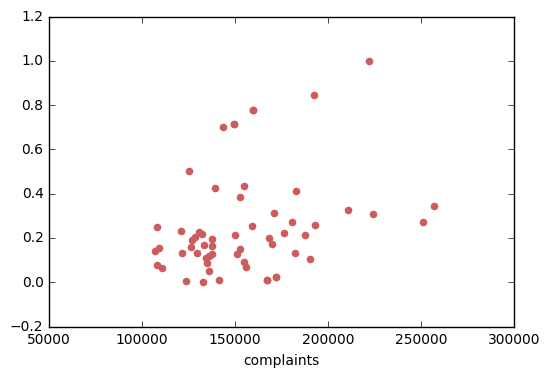

Employed Civilian Population 16 Years And Over: Service occupations


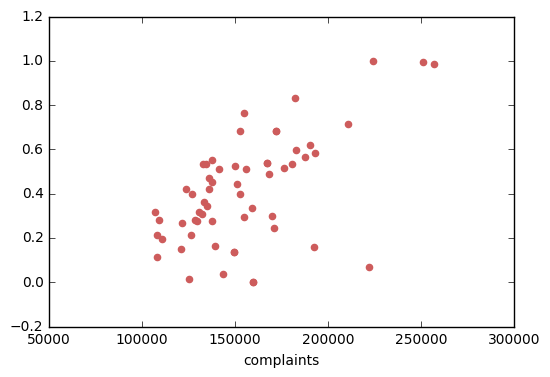

Employed Civilian Population 16 Years And Over: Sales and office occupations


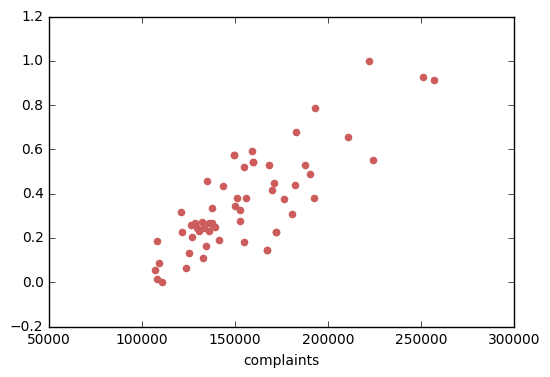

Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations


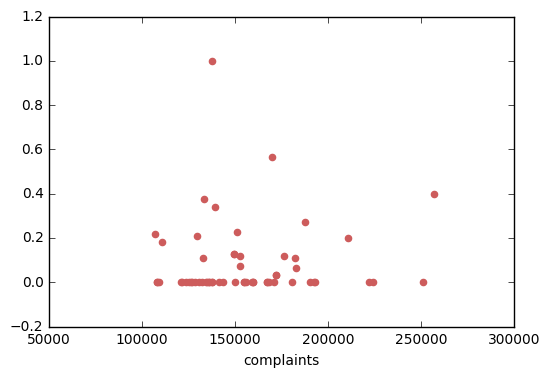

Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance  occupations


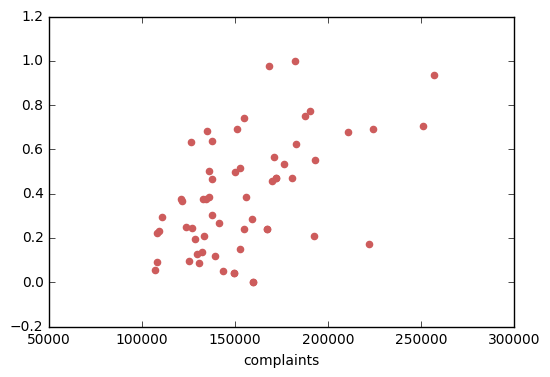

Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations


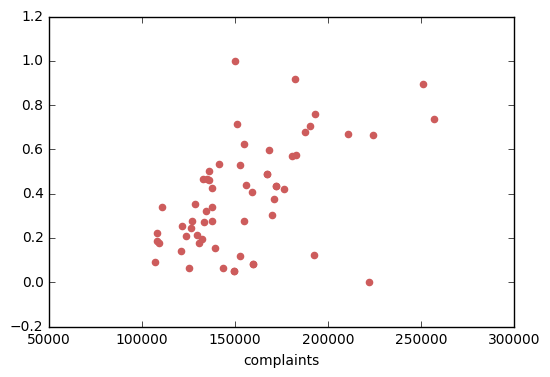

Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations


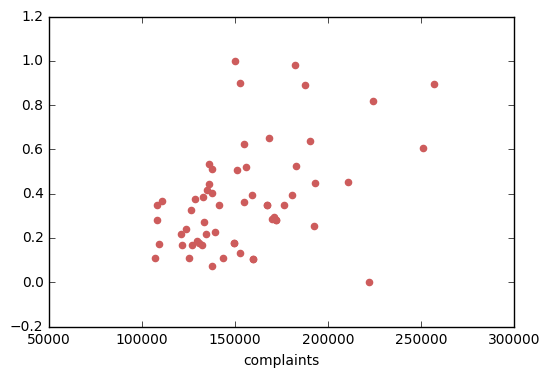

Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations


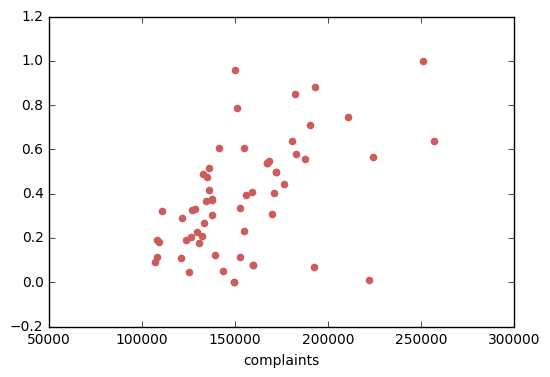

% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations


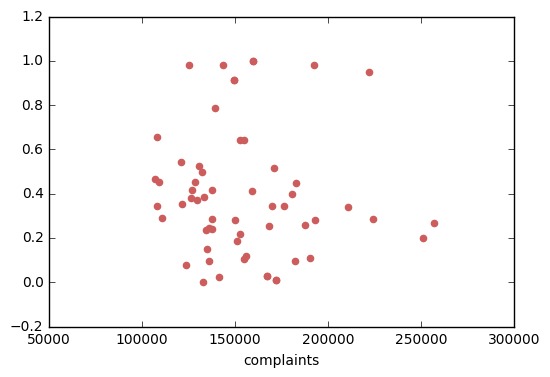

% Employed Civilian Population 16 Years And Over: Service occupations


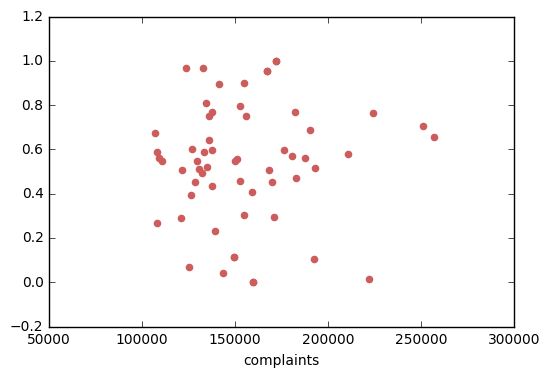

% Employed Civilian Population 16 Years And Over: Sales and office occupations


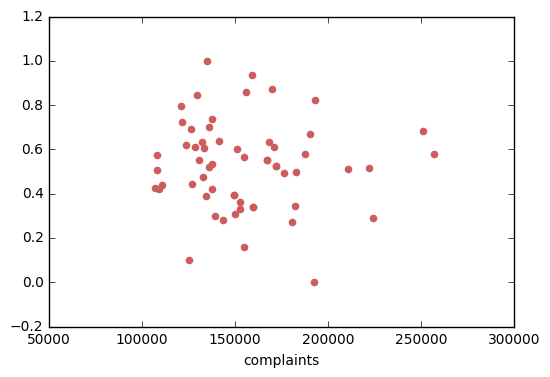

% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations


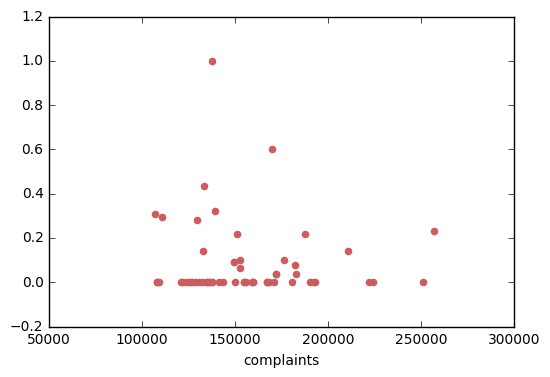

% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance  occupations


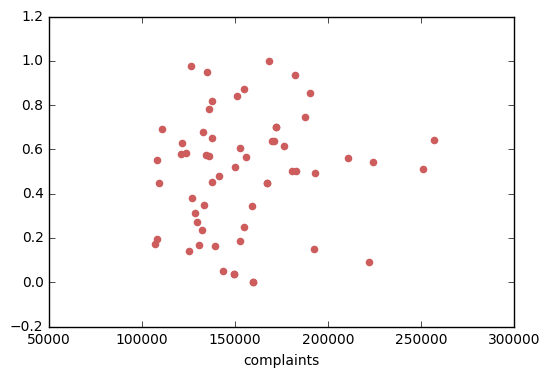

% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations


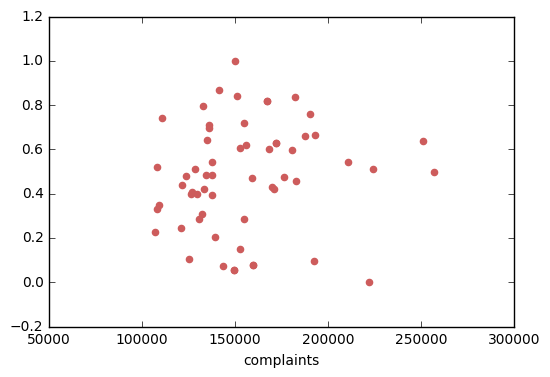

% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations


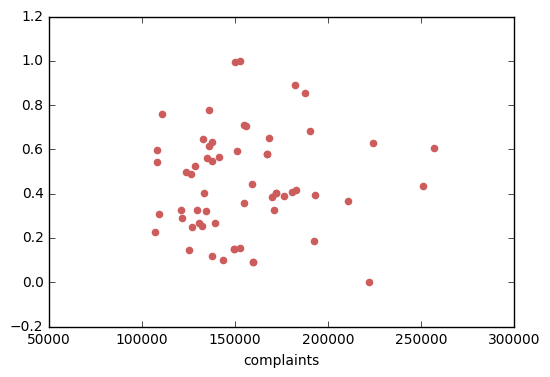

% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations


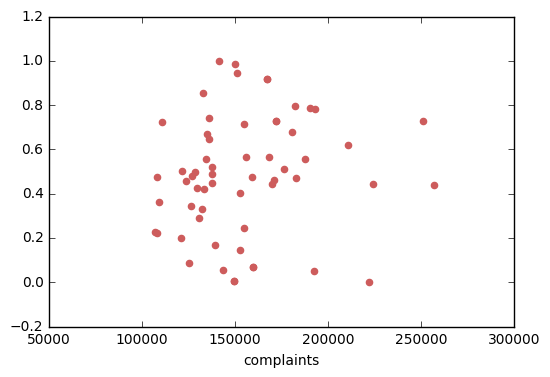

Households: Cable Modem


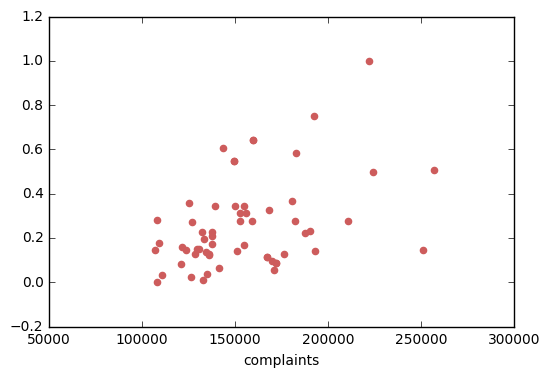

Households: With Mobile Broadband.1


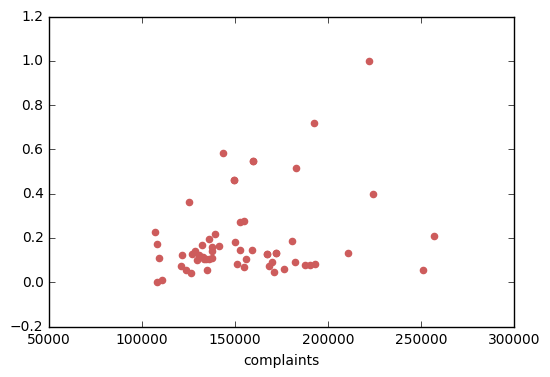

Households: Fiber-Optic


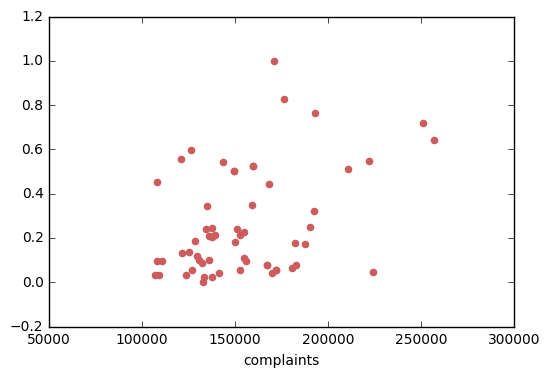

Households: With Mobile Broadband.4


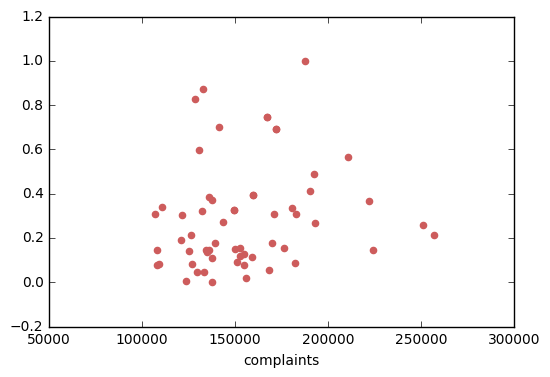

Households: Dsl


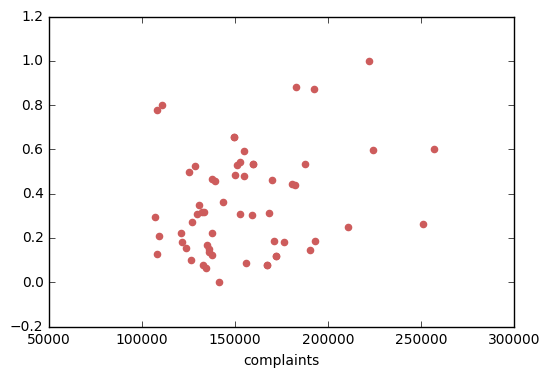

Households: With Mobile Broadband.2


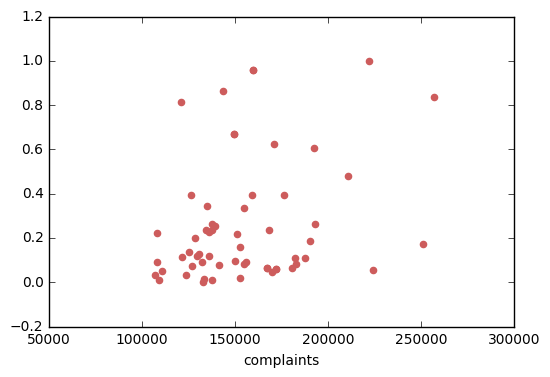

Households: Mobile Broadband Alone or With Dialup


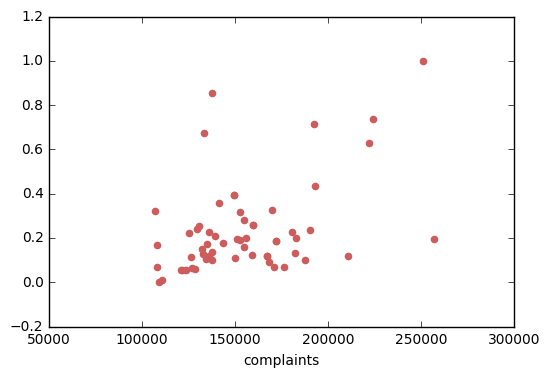

Households: With Mobile Broadband


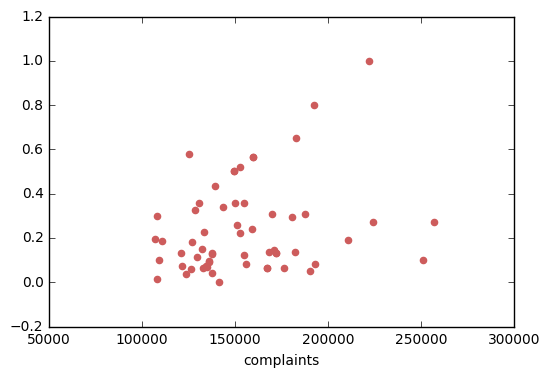

Households: Satellite Internet Service


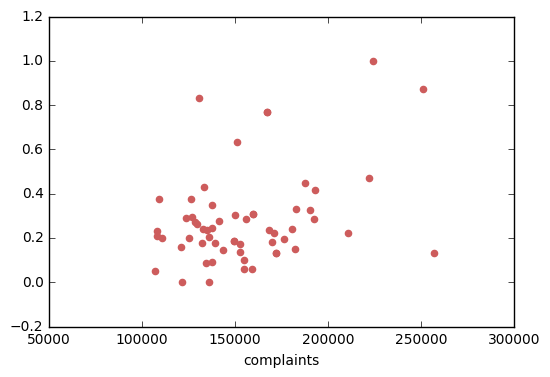

Households: Dial-Up Alone


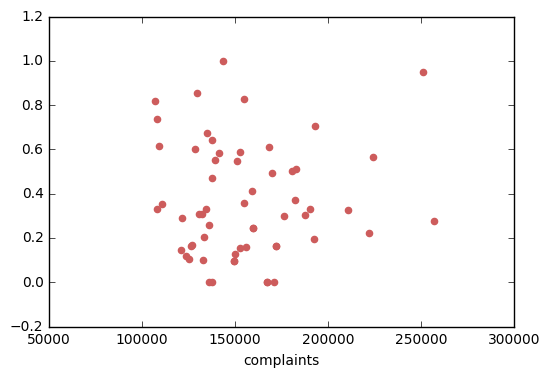

Households: With Dial-Up Internet Subscription Alone


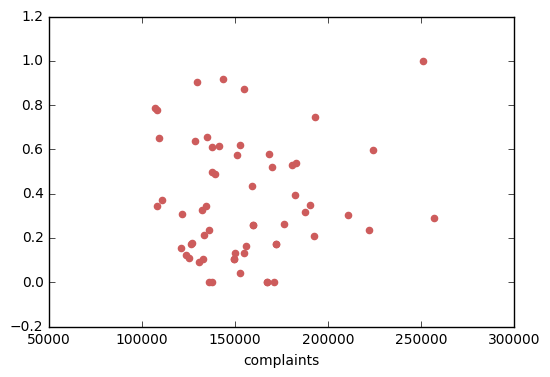

Households: With Mobile Broadband.3


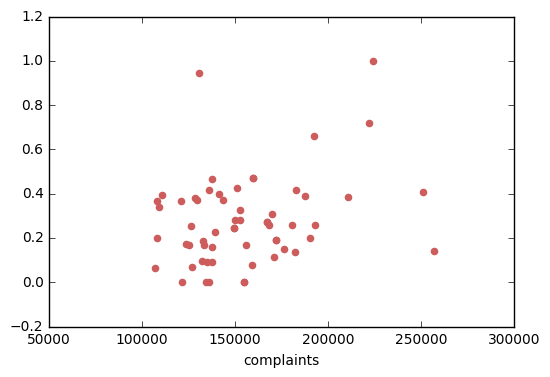

In [404]:
for i in range(3,170):
    col=merged.columns[i]
    print col
    #plt.subplot(3,3,i+1)
    pl.figure()
    #pl.plot([100000,280000],[normalize(col)[1],normalize(col)[1]],color = 'steelblue')
    pl.scatter(merged.iloc[:,2],normalize(col)[0],color = 'indianred')
    pl.xlabel('complaints')
    pl.show()
#    pl.scatter(merged.iloc[:,2],normalize('Population Density (per sq. mile)'))
#pl.scatter(merged.iloc[:,2],normalize('% Total Population: Male'),color='r')

### conclusion: 'Population 25 Years and over' , 'Population 3 Years and over', 'Employed Civilization 16 and over'the more population,  the more complaints